#### <u>Business Understanding</u>:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from 
one operator to another. In this highly competitive market, the telecommunications industry experiences an 
average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer 
than to retain an existing one, customer retention has now become even more important than customer acquisition.
 
For many operators, retaining high profitable customers is the number one business goal.
  
<b>Strategy:</b> Based on the existing customer datasets, to predict which customers are at high risk of churn and 
recommend strategies to manage customer churn based on the observations.

<b>Business Objective:</b> The objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

<b><u>Customer Behaviour During Churn</u></b>

In the given dataset of four-month window;

   <b>Good Phase  :</b> First Two Months<br>
   <b>Action Phase:</b> Third Month<br>
   <b>Churn Phase :</b> Fourth Month

<b><u>Preprocessing Rules</u></b>

   1. Consider only <b>High-value customers:</b> approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
   2. Consider Only <b>Usage-based churn:</b> Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
   
<b><u>Data Preparation:</u></b>

The following data preparation steps are crucial for this problem:
 
   1. Derive new features 
   2. Filter high-value customers 
       - Based 70th percentile of the average recharge amount in the first two months.
   3. Tag churners and remove attributes of the churn phase
       - Attributes (total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9).

<b>Note:</b> After tagging churners, Remove all the attributes corresponding to the churn phase (Name starts with'_9').


<b><u>Suggested Steps:</u></b>

   1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.).
   2. Conduct appropriate exploratory analysis to extract useful insights.
   3. Derive new features.
   4. Reduce the number of variables using PCA.
   5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance).
   6. Evaluate the models using appropriate evaluation metrics. 
   7. choose a model based on some evaluation metric.
   8. Identifying important predictor attributes which help the business to understand indicators of churn.
   9. After identifying important predictors, display them visually.<br>
   10. Recommend strategies to manage customer churn based on your observations.

#### <u>Data Sources</u>:

1. DataDictionaryTelecomChurnCaseStudy.xlsx --> Provides meaning of the column attributes for the given customer dataset.
2. telecom_churn_data.csv              --> Customer data for four months between Jun-2014 to Sep-2014.

# Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 1000)

In [2]:
data = pd.read_csv("telecom_churn_data.csv")
print(data.shape)
data.sample(5)

(99999, 226)


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
52794     7002354816        109             0.0             0.0   
15094     7001667593        109             0.0             0.0   
68647     7002039921        109             0.0             0.0   
29877     7001019651        109             0.0             0.0   
97405     7001292417        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
52794             0.0            6/30/2014            7/31/2014   
15094             0.0            6/30/2014            7/31/2014   
68647             0.0            6/30/2014            7/31/2014   
29877             0.0            6/30/2014            7/31/2014   
97405             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
52794            8/31/2014            9/30/2014  127.263   52.672    2.370   
15094            8/31/2014            9/30/2014  179.494  153.684  120.700   
68647            8/31/2014            9/30/2014  281.634  309.348  251.416   
29877            8/31/2014            9/30/2014  162.475  208.734  140.960   
97405            8/31/2014            9/30/2014  312.583  217.839  216.364   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
52794    9.050        42.21        12.74         1.65         0.00   
15094  198.424        46.64        39.74        11.11        52.48   
68647  298.034        22.31        25.88        15.33         9.66   
29877  139.304        57.28        51.26        67.73        30.79   
97405  153.611       156.09        89.44        80.48        54.46   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
52794         80.01         62.69          0.71         22.24           0.00   
15094        123.58        124.46         86.46        137.39           1.45   
68647         53.34         60.34         47.38         38.83           0.00   
29877        110.36        201.93         79.21        108.56        1293.89   
97405        209.73        127.49        144.06         75.34           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
52794           0.00           0.00           0.00           0.00   
15094           0.00           0.00           1.86           0.10   
68647           0.00           0.00           0.00           0.00   
29877        1084.26        1334.64        1518.19         167.64   
97405           0.00           0.00           0.00           0.00   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
52794           0.00           0.00           0.00             37.08   
15094           0.00           0.00          14.76             23.88   
68647           0.00           0.00           0.00             22.31   
29877         253.19         146.94         139.36              0.00   
97405           0.00           0.00           0.00            156.09   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
52794             12.74              1.65              0.00             61.86   
15094              3.54              2.23             31.09             14.79   
68647             25.88             15.33              9.66             53.34   
29877              0.00              0.00              0.00              0.00   
97405             89.44             80.18             54.31            209.34   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
52794             54.28              0.71             21.21              6.13   
15094             21.06              1.31             22.68              1.96   
68647             59.33             47.38             38.83              0.00   
29877              0.00              0.00              0.00              0.00   
97405            127.49            137.89             74.51              0.38   

       l

In [3]:
# Checking the data insight
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [4]:
# Checking for dupicates in mobile number column
sum(data.duplicated(subset= "mobile_number"))

0

**Initial Observations**
- There are 226 columns mostly divided for 4 months 6-9
- To decide the churn rate columns related to revenue, recharge, usage are important
- As per given information we need to identify the prime customers which needs analysis of behaviour of customer
- As every feature has total column also for a particular month, it is useful for analysis

In [5]:
# Checking Null Values
data.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [6]:
# Extracting columns which represent some total
monthwise_total = data.columns[data.columns.str.contains('total')]
monthwise_total

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'],
      dtype='object')

In [7]:
# Extracting columns which represent some recharge
monthwise_recharges = data.columns[data.columns.str.contains('rech_amt')]
monthwise_recharges

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

## Churn or Not Churn

**As per the given context:**
- We need to create new column for labeling churn or not churn as per the 9th month usage information
- After that need to drop the 9th months data

In [8]:
# Finding all columns related to september month
sep_col = [x for x in list(data) if "_9" in x or "sep" in x or "Sep" in x or "September" in x or "september" in x]
print(sep_col)


#from these columns to detemine churn or not we only need information from incoming, outgoing and data usage.
data['churn'] = np.where(data[['vol_2g_mb_9','vol_3g_mb_9', 'total_ic_mou_9','total_og_mou_9']].sum(axis = 1) == 0,1,0)
print(data.shape)
data.head(3)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g']
(99999, 22

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN            0.0   
1        304.76         53.76            0.0            0.0            0.0   
2        208.36        118.91            0.0            0.0            0.0   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN            0.0            NaN   
1           0.00            0.0            0.0            0.0           0.00   
2          38.49            0.0            0.0            0.0          70.94   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1              4.11              0.00              0.00              0.00   
2             26.49             22.58              8.76             41.81   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.46              0.13              0.00              0.00   
2             67.41             75.53              9.28              1.48   

   std_og_t2f_mou_

In [9]:
#Checking data balance for Churning 
print(data.churn.value_counts()/len(data))


0    0.898089
1    0.101911
Name: churn, dtype: float64


In [10]:
# Dropping information related to column 9 as it will not be available for prediction
data = data.drop(columns=sep_col, axis = 1)
print(data.shape)

(99999, 172)


**As per the problem statement the high-value customers shoud be defined as:**

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

- To identify the high value customers we need to check the total usage 
- We have 2 kinds of recharge 1) cellular 2) Data
- We will find the total recharge amount for month 6 & 7 and create a new dataframe for prime(high value) customers only

In [11]:
# Extracting columns which represent some recharge
monthwise_recharges = data.columns[data.columns.str.contains('rech_amt')]
monthwise_recharges

monthwise_data_recharges_cols = data.columns[data.columns.str.contains('_data_')]
monthwise_data_recharges_cols
# from above column list we have total recharged data but not the cost; we can get it by multiplying the avg data rech amnt

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')

**Derived few columns as per requirement**

In [12]:
# derived Columns which are required for further calculation
columns_to_consider_cell = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']
columns_to_consider_data = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                      'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

In [13]:
# Calculate the total data recharge amount 
data['total_data_rech_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6'] 
data['total_data_rech_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_rech_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']
data.shape

(99999, 175)

In [14]:
# now we don't need other 2 columns as we have calculated the total data recharge amount hence dropping them 
data = data.drop(columns=columns_to_consider_data, axis = 1)
data.shape

(99999, 169)

In [15]:
# To calculate total recharge amount we need following columns
total_rech_6_and_7_cols = ['total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_rech_amt_6', 'total_rech_amt_7']

# Check if null values are there
print(data[total_rech_6_and_7_cols].isnull().sum())

# We will replace null with 0 for now
data[total_rech_6_and_7_cols] = data[total_rech_6_and_7_cols].fillna(0)

# Check if null values are there
print(data[total_rech_6_and_7_cols].isnull().sum())

total_data_rech_amt_6    74846
total_data_rech_amt_7    74428
total_rech_amt_6             0
total_rech_amt_7             0
dtype: int64
total_data_rech_amt_6    0
total_data_rech_amt_7    0
total_rech_amt_6         0
total_rech_amt_7         0
dtype: int64


In [16]:
# Now we will derive new column as total_avg_rech_amt_6_and_7 to store total avg recharge amount for month 6 and 7
total_avg_rech_amt_6_and_7 = (data['total_data_rech_amt_6'] + data['total_data_rech_amt_7'] \
                                 + data['total_rech_amt_6'] + data['total_rech_amt_7'])/2
print("Total Avg amount of recharge for 6 and 7 mnth is: ", sum(total_avg_rech_amt_6_and_7) , "\n\n")
data.head(5)

Total Avg amount of recharge for 6 and 7 mnth is:  48532321.43 




mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  197.385   
1            6/30/2014            7/31/2014            8/31/2014   34.047   
2            6/30/2014            7/31/2014            8/31/2014  167.690   
3            6/30/2014            7/31/2014            8/31/2014  221.338   
4            6/30/2014            7/31/2014            8/31/2014  261.636   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  214.816  213.803          NaN          NaN         0.00           NaN   
1  355.074  268.321        24.11        78.68         7.68         15.74   
2  189.058  210.226        11.54        55.24        37.26        143.33   
3  251.102  508.054        99.91        54.39       310.98        123.31   
4  309.876  238.174        50.31       149.44        83.89         76.96   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
1         99.84        304.76            0.0           0.00           0.00   
2        220.59        208.36            0.0           0.00           0.00   
3        109.01         71.68            0.0          54.86          44.38   
4         91.88        124.26            0.0           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
1            0.0           0.00           0.00             23.88   
2            0.0           0.00           0.00              7.19   
3            0.0          28.09          39.04             73.68   
4            0.0           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             11.51             75.94   
2             28.74             13.58             29.34             16.86   
3             34.81             10.61            107.43             83.21   
4            149.44             83.89             67.64             91.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
1            291.86              0.00              0.00              0.00   
2             38.46             24.11             21.79             15.61   
3             22.46              1.91              0.65              4.91   
4            124.26              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
1               0.0              2.91              0.00         35.39   
2               0.0            135.54             45.76         60.66   
3               0.0              0.00              0.00        183.03   
4               0.0              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
1        150.51        299.54              0.23              4.11   
2         67.41         67.66              4.34             26.49   
3        118.68         37.99             26.23             14.89   
4        241.33     

In [17]:
# We need highvalue customers which have 70% or more avg recharge amount (6 & 7 month)
prime_cust_threshold = np.percentile(total_avg_rech_amt_6_and_7, 70.0)
print("The prime customer threshold recharge amount is: ", prime_cust_threshold)

The prime customer threshold recharge amount is:  478.0


In [18]:
# Now we will create new dataframe which will have only prime customer with percentile recharge >=70
prime = data[total_avg_rech_amt_6_and_7 >= prime_cust_threshold]
prime.shape

(30001, 169)

In [19]:
# Checking the data balance
print(prime.churn.value_counts()/len(prime))
prime_backup = prime.copy()

prime.head(3)

0    0.918636
1    0.081364
Name: churn, dtype: float64


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   197.385   
7            6/30/2014            7/31/2014            8/31/2014  1069.180   
8            6/30/2014            7/31/2014            8/31/2014   378.721   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.816   213.803          NaN          NaN         0.00           NaN   
7  1349.850  3171.480        57.84        54.68        52.29        453.43   
8   492.223   137.362       413.69       351.03        35.08         94.66   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
7        567.16        325.91          16.23          33.49          31.64   
8         80.63        136.48           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
7          23.74          12.59          38.06             51.39   
8           0.00           0.00           0.00            297.13   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
7             31.38             40.28            308.63            447.38   
8            217.59             12.49             80.96             70.58   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
7            162.28             62.13             55.14             53.23   
8             50.54              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
7               0.0               0.0              0.00        422.16   
8               0.0               0.0              7.15        378.09   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
7        533.91        255.79              4.30             23.29   
8        288.18         63.04            116.56            133.43   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00               NaN               NaN              0.00   
7             12.01             49.89             31.76             49.14   
8             22.58             13.69             10.04             75.69   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  \
0               NaN               NaN              0.00               NaN   
7              6.66             20.08             16.68               0.0   
8              0.00              0.00              0.00               0.0   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  \
0               NaN               0.0           NaN           NaN   
7               0.0               0.0         60.86         75.14   
8               0.0               0.0        130.26        143.48   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          0.00           NaN           NaN          0.00           NaN   
7         77.84           0.0          0.18         10.01           4.5   
8         98.28           0.0          0.00          0.00           0.0   

   spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0           NaN   

# EDA and Data Cleaning

In [20]:
# Getting the columns with only one unique value
cols_to_remove = []
for i in list(prime):
    if len(prime[i].value_counts()) == 1:
        cols_to_remove.append(i)
print(cols_to_remove)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [21]:
# Droping columns with no variance 
prime = prime.drop(cols_to_remove, axis= 1)
prime.shape

(30001, 156)

In [22]:
# Percentage of null values in different columns
col_list = list(prime)
null = []
for i in prime.isnull().sum()*100/prime.shape[0]:
    null.append(i)
data = {"columns": col_list, "% null": null}
df_null = pd.DataFrame(data)
df_null[df_null["% null"] != 0]

columns     % null
4                 onnet_mou_6   1.816606
5                 onnet_mou_7   1.789940
6                 onnet_mou_8   3.913203
7                offnet_mou_6   1.816606
8                offnet_mou_7   1.789940
9                offnet_mou_8   3.913203
10              roam_ic_mou_6   1.816606
11              roam_ic_mou_7   1.789940
12              roam_ic_mou_8   3.913203
13              roam_og_mou_6   1.816606
14              roam_og_mou_7   1.789940
15              roam_og_mou_8   3.913203
16           loc_og_t2t_mou_6   1.816606
17           loc_og_t2t_mou_7   1.789940
18           loc_og_t2t_mou_8   3.913203
19           loc_og_t2m_mou_6   1.816606
20           loc_og_t2m_mou_7   1.789940
21           loc_og_t2m_mou_8   3.913203
22           loc_og_t2f_mou_6   1.816606
23           loc_og_t2f_mou_7   1.789940
24           loc_og_t2f_mou_8   3.913203
25           loc_og_t2c_mou_6   1.816606
26           loc_og_t2c_mou_7   1.789940
27           loc_og_t2c_mou_8   3.913203
28               loc_og_mou_6   1.816606
29               loc_og_mou_7   1.789940
30               loc_og_mou_8   3.913203
31           std_og_t2t_mou_6   1.816606
32           std_og_t2t_mou_7   1.789940
33           std_og_t2t_mou_8   3.913203
34           std_og_t2m_mou_6   1.816606
35           std_og_t2m_mou_7   1.789940
36           std_og_t2m_mou_8   3.913203
37           std_og_t2f_mou_6   1.816606
38           std_og_t2f_mou_7   1.789940
39           std_og_t2f_mou_8   3.913203
40               std_og_mou_6   1.816606
41               std_og_mou_7   1.789940
42               std_og_mou_8   3.913203
43               isd_og_mou_6   1.816606
44               isd_og_mou_7   1.789940
45               isd_og_mou_8   3.913203
46               spl_og_mou_6   1.816606
47               spl_og_mou_7   1.789940
48               spl_og_mou_8   3.913203
49                og_others_6   1.816606
50                og_others_7   1.789940
51                og_others_8   3.913203
55           loc_ic_t2t_mou_6   1.816606
56           loc_ic_t2t_mou_7   1.789940
57           loc_ic_t2t_mou_8   3.913203
58           loc_ic_t2m_mou_6   1.816606
59           loc_ic_t2m_mou_7   1.789940
60           loc_ic_t2m_mou_8   3.913203
61           loc_ic_t2f_mou_6   1.816606
62           loc_ic_t2f_mou_7   1.789940
63           loc_ic_t2f_mou_8   3.913203
64               loc_ic_mou_6   1.816606
65               loc_ic_mou_7   1.789940
66               loc_ic_mou_8   3.913203
67           std_ic_t2t_mou_6   1.816606
68           std_ic_t2t_mou_7   1.789940
69           std_ic_t2t_mou_8   3.913203
70           std_ic_t2m_mou_6   1.816606
71           std_ic_t2m_mou_7   1.789940
72           std_ic_t2m_mou_8   3.913203
73           std_ic_t2f_mou_6   1.816606
74           std_ic_t2f_mou_7   1.789940
75           std_ic_t2f_mou_8   3.913203
76               std_ic_mou_6   1.816606
77               std_ic_mou_7   1.789940
78               std_ic_mou_8   3.913203
82               spl_ic_mou_6   1.816606
83               spl_ic_mou_7   1.789940
84               spl_ic_mou_8   3.913203
85               isd_ic_mou_6   1.816606
86               isd_ic_mou_7   1.789940
87               isd_ic_mou_8   3.913203
88                ic_others_6   1.816606
89                ic_others_7   1.789940
90                ic_others_8   3.913203
100       date_of_last_rech_6   0.243325
101       date_of_last_rech_7   0.326656
102       date_of_last_rech_8   1.943269
106  date_of_last_rech_data_6  44.148528
107  date_of_last_rech_data_7  43.145228
108  date_of_last_rech_data_8  46.825106
109           max_rech_data_6  44.148528
110           max_rech_data_7  43.145228
111           max_rech_data_8  46.825106
112           count_rech_2g_6  44.148528
113           count_rech_2g_7  43.145228
114           count_rech_2g_8  46.825106
115           count_rech_3g_6  44.148528
116           count_rech_3g_7  43.145228
117           count_rech_3g_8  46.825106
124                 arpu_3g_6  44.148528
125 

In [23]:
# Let's check the columns with very large number (>= 40%) of null values
col_list = list(prime)
null = []
for i in prime.isnull().sum()*100/prime.shape[0]:
    null.append(i)
data = {"columns": col_list, "% null": null}
df_null = pd.DataFrame(data)
df_null[df_null["% null"] >= 40].shape

(25, 2)

So there are 25 columns with very high null values

In [24]:
# Checking above 25 columns 
correlation = []

lst = list(df_null[df_null["% null"] >= 40]["columns"])

NonNumCols = []
NumCols = []

for col in list(prime[lst]):
    if prime[lst][col].dtypes == "object":
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
        
for i in NumCols:
    corr = round(list(prime[["churn", i]].corr()[i])[0], 3)
    correlation.append(corr)

print(correlation)

[0.002, -0.008, -0.027, 0.018, -0.003, -0.04, 0.034, 0.02, -0.013, 0.026, 0.007, -0.017, 0.031, 0.012, -0.014, 0.016, 0.003, -0.002, -0.011, -0.013, -0.079, -0.034]


**Observations**: Almost there is no correlation between these 25 columns and churn

In [25]:
# We can see that all the numerical columns with very high (>= 40%) null values are not of much importance for our model building.So, we can drop these columns
prime = prime.drop(NumCols, axis = 1)
prime.shape

(30001, 134)

In [26]:
# Imputing Categorical missing values with the mode
for i in NonNumCols:
    prime[i].fillna(prime[i].mode()[0], inplace=True)

In [27]:
# List of columns related to 'date'
date_cols = [x for x in list(prime) if "date" in x]
print(date_cols)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [28]:
# Extracting day from the date
for i in date_cols:
    prime[i] = pd.to_datetime(prime[i]).dt.day

In [29]:
prime.head(3)

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803          NaN          NaN   
7     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8     7001524846   378.721   492.223   137.362       413.69       351.03   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00           NaN           NaN          0.00            NaN   
7        52.29        453.43        567.16        325.91          16.23   
8        35.08         94.66         80.63        136.48           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            NaN           0.00            NaN            NaN           0.00   
7          33.49          31.64          23.74          12.59          38.06   
8           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               NaN               NaN              0.00               NaN   
7             51.39             31.38             40.28            308.63   
8            297.13            217.59             12.49             80.96   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               NaN              0.00               NaN               NaN   
7            447.38            162.28             62.13             55.14   
8             70.58             50.54              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               NaN               NaN              0.00   
7             53.23               0.0               0.0              0.00   
8              0.00               0.0               0.0              7.15   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           NaN           NaN          0.00               NaN   
7        422.16        533.91        255.79              4.30   
8        378.09        288.18         63.04            116.56   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
7             23.29             12.01             49.89             31.76   
8            133.43             22.58             13.69             10.04   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
7             49.14              6.66             20.08             16.68   
8             75.69              0.00              0.00              0.00   

   std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0           NaN           NaN          0.00           NaN           NaN   
7         60.86         75.14         77.84           0.0          0.18   
8        130.26        143.48         98.28           0.0          0.00   

   isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0          0.00           NaN           NaN          0.00          NaN   
7         10.01           4.5           0.0          6.50          0.0   
8          0.00           0.0           0.0         10.23          0.0   

   og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0          NaN          0.0            0.00            0.00            0.00   
7          0.0          0.0          487.53          609.24          350.16   
8          0.0          0.0          508.36          431.66          171.56   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0               NaN               NaN              0.16               NaN   
7             58.14             32.26             27.31            217.56   
8             23.84              9.84              0.31             57.58   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_

In [30]:
# We still have few null vlaues which we will drop (dropping the rows with null values present)
for i in prime.columns:
    if prime[i].isnull().sum()>0:
        prime = prime[~np.isnan(prime[i])]

prime.shape

(28163, 134)

In [31]:
# Checking for null values again
col_list = list(prime)
null = []
for i in prime.isnull().sum()*100/prime.shape[0]:
    null.append(i)
data = {"columns": col_list, "% null": null}
df_null = pd.DataFrame(data)
df_null[df_null["% null"] != 0]

Empty DataFrame
Columns: [columns, % null]
Index: []

**Observation:**
The data now contain no null values and we can proceed ahead.

## Helper Functions

In [32]:
def display_boxplot(variable, data):
    fig_dims = (18,2)
    fig, ax = plt.subplots(figsize = fig_dims)
    sns.boxplot(x= variable, data=data, ax=ax)

def display_countplot(variable, data):
    fig_dims = (10, 7)
    fig, ax = plt.subplots(figsize = fig_dims)
    sns.countplot(x=data.churn, data=data, hue=variable)
    
def display_barplot(variable, data):
    g = sns.countplot(x=data[variable], data=data)
    total = len(data)
    sizes = []
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.0,
               height-15,
               '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=8)

In [33]:
#Plotting separate graphs for all nuerical variables to check distribution
def plot_box_dist(i,j, total, data):

    a=total
    b=2
    c=1
    num_cols = data.columns[i:j]

    fig = plt.figure(figsize=(40,100))
    fig.set_size_inches(30,250)

    for i in num_cols:
        plt.subplot(a,b,c)
        plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=25)
        plt.xlabel(i,fontsize=25)
        plt.ylabel(i,fontsize=25)
        plt.xticks(fontsize=25,rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=25)
        sns.boxplot(data[i], color='r')
        c=c+1
        plt.subplot(a,b,c)
        plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=25)
        plt.xlabel(i,fontsize=25)
        plt.ylabel(i,fontsize=25)
        plt.xticks(fontsize=25,rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=25)
        sns.distplot(data[i],color = 'r') #check the estimator 'mean' here by default
        c = c+1
    fig.tight_layout()
    plt.show();

In [34]:
# Function for outlier detection and removal
'''
Even though the upper and lower bond formulae are as given below

fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

we will still remove otliers avobe 99% and below 1% data
'''

def remove_outlier(df_in, col_name):
    fence_low = df_in[col_name].quantile(0.01)
    fence_high = df_in[col_name].quantile(0.99)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [35]:
# Function to draw the Plots
def draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows):
    plt.figure(figsize=(20,8))
    
    if y_data == 'vbc_3g':
        
        plt.subplot(231)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y='jun_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(232)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y='jul_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(233)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y='aug_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(234)
        plot = sns.barplot(data=dataframe_name, x=x_data, y='jun_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(235)
        plot = sns.barplot(data=dataframe_name, x=x_data, y='jul_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(236)
        plot = sns.barplot(data=dataframe_name, x=x_data, y='aug_vbc_3g')
        plot.set(xlabel=x_label, ylabel=y_label)
        
    elif y_data == 'aon':
            
        plt.figure(figsize=(20,6))
        plt.subplot(121)
        plot = sns.barplot(data=dataframe_name, x=x_data, y=y_data)
        plot.set(xlabel=x_label, ylabel=y_label)
        plt.subplot(122)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y=y_data)
        plot.set(xlabel=x_label, ylabel=y_label)
    
    else:
    
        plt.subplot(231)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y=y_data + '_6')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(232)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y=y_data + '_7')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(233)
        plot = sns.boxplot(data=dataframe_name, x=x_data, y=y_data + '_8')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(234)
        plot = sns.barplot(data=dataframe_name, x=x_data, y=y_data + '_6')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(235)
        plot = sns.barplot(data=dataframe_name, x=x_data, y=y_data + '_7')
        plot.set(xlabel=x_label, ylabel=y_label)

        plt.subplot(236)
        plot = sns.barplot(data=dataframe_name, x=x_data, y=y_data + '_8')
        plot.set(xlabel=x_label, ylabel=y_label)
        
    plt.suptitle(plot_title)
    
    plt.show()

### Low Correlation Features

In [36]:
# Finding correlation between all the variables wrt Churn
correlation_df = pd.DataFrame(prime.corr()['churn']).reset_index()
correlation_df.set_index(['index'], inplace = True)

#Selection Features with the more positive or negative correlations with SalePrice
correlation_df = correlation_df.loc[(correlation_df.churn > 0.02) | (correlation_df.churn < -0.02)]
features = list(correlation_df.index)
print(features)

print("Total correlated features: ",len(features))

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std

In [37]:
filtered_prime = prime[features]
print(filtered_prime.shape)
filtered_prime.head()

(28163, 97)


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
33              0.00              0.00              0.00              0.00   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7              53.23        422.16        533.91        255.79   
8               0.00        378.09        288.18         63.04   
21              1.58         97.04         94.09        129.74   
23              0.00        131.91        133.68        182.14   
33              0.00          0.00          0.00          0.00   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   
33              0.00              0.00              0.00              0.00   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_6  \
7              31.76             49.14             16.68         60.86   
8              10.04             75.69              0.00        130.26   
21            808.74            876.99              0.00        763.29   
23              6.35             39.61              0.00          2.36   
33              0.00              0.00              0.00          0.00   

    std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_8  total_og_mou_6  \
7          75.14         77.84           4.5          6.50          487.53   
8         143.48         98.28           0.0         10.23          508.36   
21        934.69        938.79           0.0          0.00          860.34   
23          6.35         39.61           0.1         17.71          134.38   
33          0.00          0.00           0.0      

In [38]:
# plotting few plots to check features with outliers

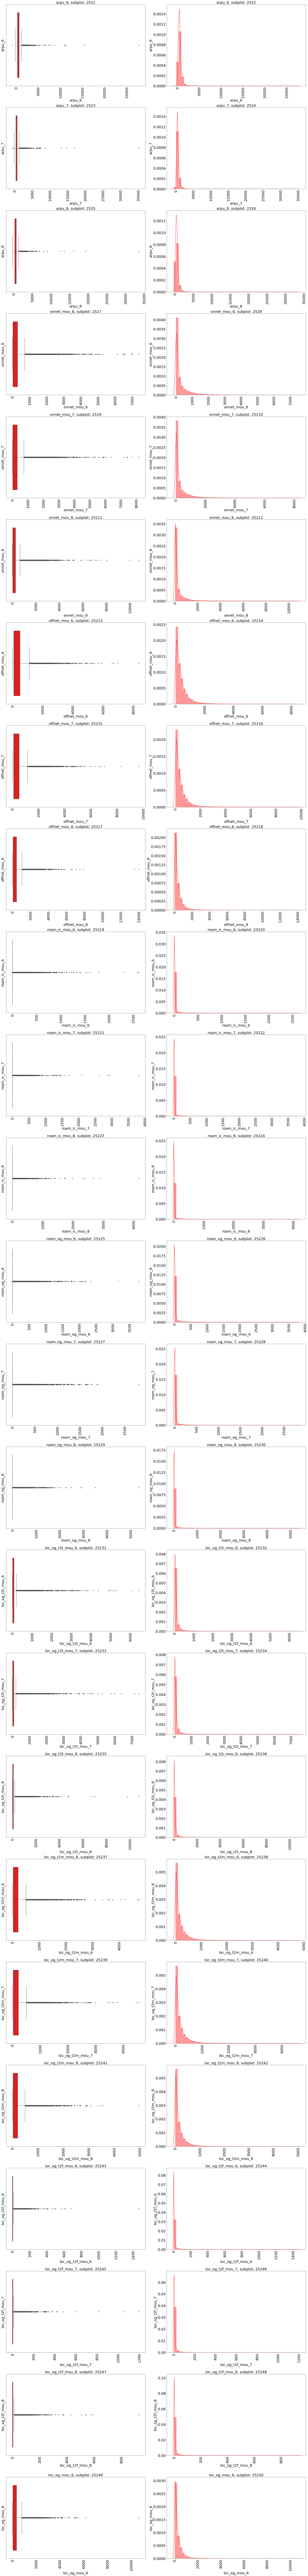

In [39]:
# Batch 1
plot_box_dist(0,25,25,filtered_prime)

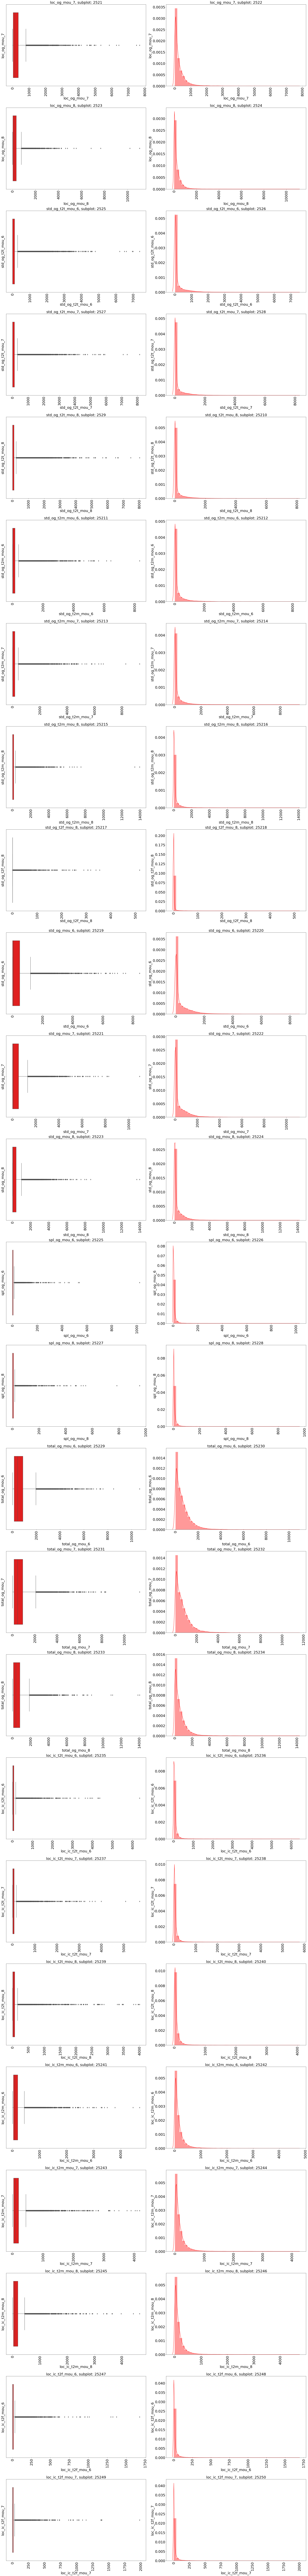

In [40]:
# Batch 2
plot_box_dist(25,50,25,filtered_prime)

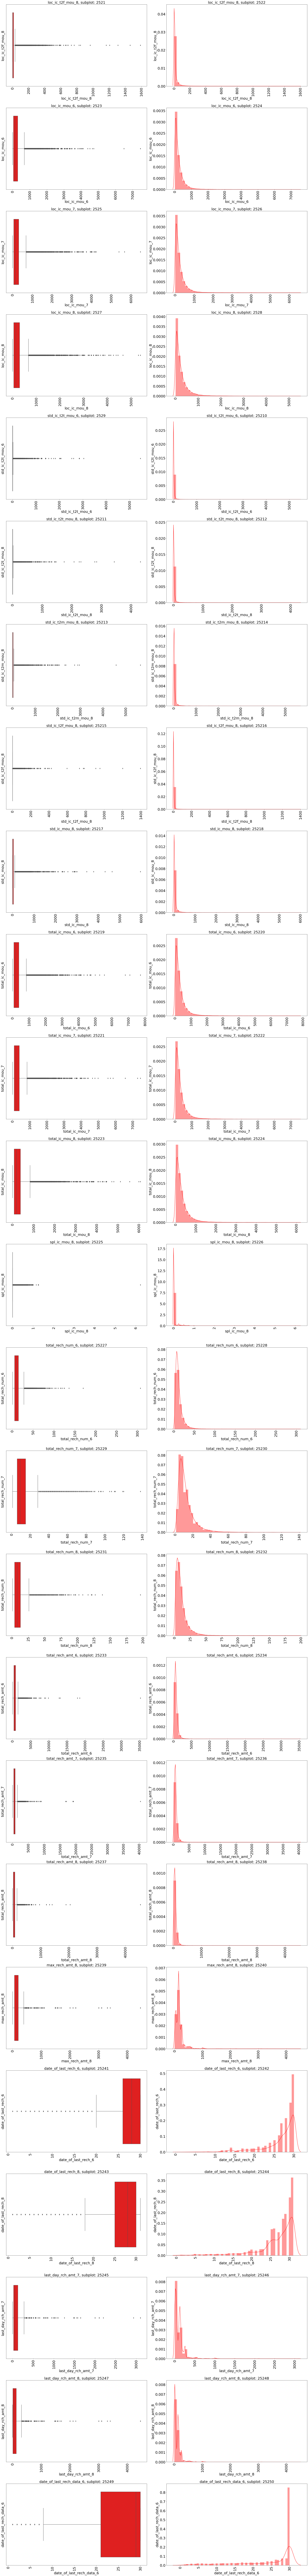

In [41]:
# Batch 3
plot_box_dist(50,75,25,filtered_prime)

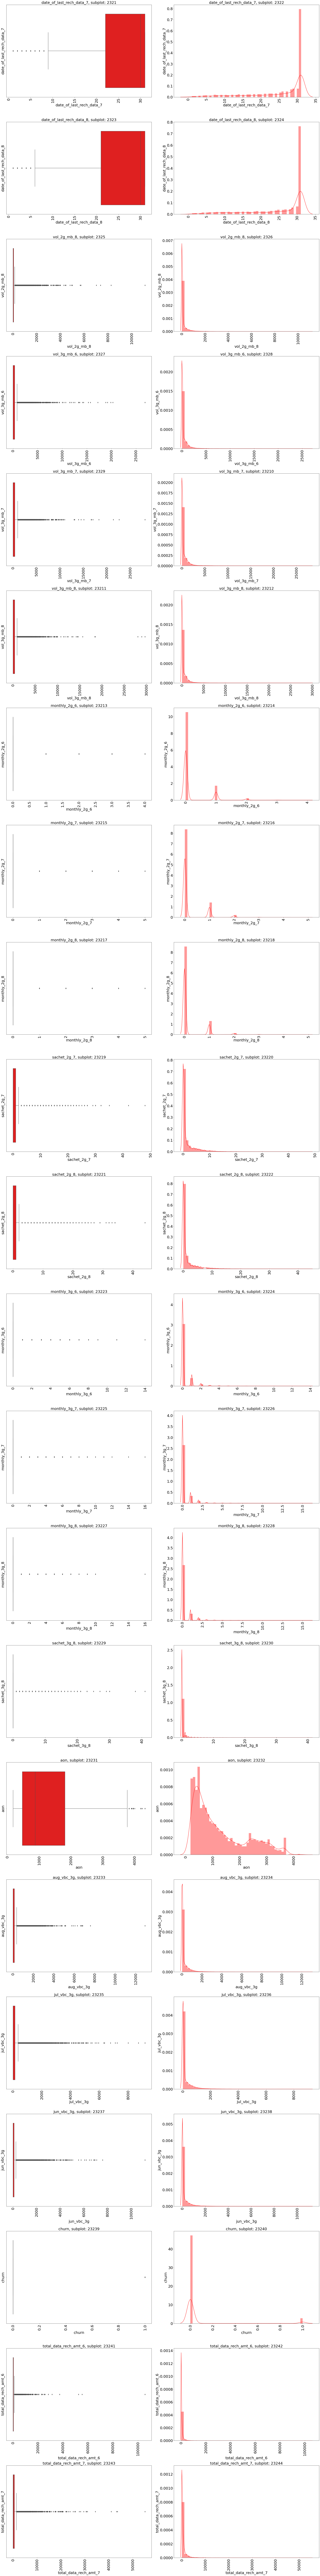

In [42]:
# Batch 4
plot_box_dist(75,97,23,filtered_prime)

### Outlier Treatment

In [43]:
# Let's see the outliers on each perecentiles level
filtered_prime.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  28163.000000  28163.000000  28163.000000  28163.000000  28163.000000   
mean     561.489279    572.836869    528.992500    265.671912    276.742606   
std      449.110299    479.722691    500.479643    458.807410    482.945814   
min     -810.661000   -622.509000   -345.129000      0.000000      0.000000   
1%        25.593560     43.687840      0.100000      0.000000      0.000000   
10%      183.592600    195.219400    126.512600      2.080000      1.942000   
25%      318.985000    324.922000    258.075500     20.280000     19.780000   
50%      486.084000    490.526000    445.338000     90.440000     90.540000   
75%      699.251500    705.983500    675.208500    299.950000    306.945000   
90%      989.388800   1002.784200    992.278400    761.160000    803.190000   
95%     1233.316900   1268.796100   1267.645200   1135.293000   1206.305000   
99%     1956.684860   1999.516720   1989.353620   2147.356400   2220.590400   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28163.000000  28163.000000  28163.000000  28163.000000   28163.000000   
mean     246.288657    379.511912    390.261793    351.089623      16.352159   
std      465.372774    477.187560    501.053439    482.498518      75.823777   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
10%        0.930000     18.532000     18.310000     10.830000       0.000000   
25%       15.340000     81.050000     81.100000     62.040000       0.000000   
50%       75.110000    232.110000    232.810000    202.140000       0.000000   
75%      259.685000    494.450000    507.720000    459.160000       0.000000   
90%      690.952000    897.422000    930.870000    845.310000      28.840000   
95%     1105.455000   1251.607000   1291.168000   1186.976000      87.039000   
99%     2185.196800   2294.596000   2413.013600   2202.410600     344.821800   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   28163.000000   28163.000000   28163.000000   28163.000000   
mean       12.912045      13.145865      26.923494      20.591421   
std        76.601091      76.125433     116.586425      97.777508   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.954000      16.826000      52.122000      32.020000   
95%        57.461000      59.989000     147.902000     108.082000   
99%       287.024400     290.295000     531.215400     445.860000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   28163.000000      28163.000000      28163.000000      28163.000000   
mean       20.926258         87.154324         89.424203         82.376724   
std       107.722393        232.347149        245.864931        233.412303   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.000000          0.030000          0.000000   
25%         0.000000          5.360000          5.860000          4.230000   
50%         0.000000         26.260000         27.030000         23.960000   
75%         0.000000         81.050000         82.630000         77.320000   
90%        32.170000        193.650000

**Removing the entries above 99 percentile and below 1 percentile**

In [44]:
# Removing the entries above 99 percentile and below 1 percentile
cols = [col for col in list(filtered_prime) if col not in ["churn","mobile_number"]]
print(len(cols))

96


In [45]:
for col in cols:
    ptls = filtered_prime[col].quantile([0.01,0.99]).values
    filtered_prime[col][filtered_prime[col] <= ptls[0]] = ptls[0]
    filtered_prime[col][filtered_prime[col] >= ptls[1]] = ptls[1]

ptls

array([   0.  , 6272.38])

In [46]:
filtered_prime.shape

(28163, 97)

In [47]:
filtered_prime.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  28163.000000  28163.000000  28163.000000  28163.000000  28163.000000   
mean     552.391627    563.068270    518.499873    257.099201    267.638037   
std      350.380797    356.034095    376.827606    402.713132    422.762043   
min       25.593560     43.687840      0.100000      0.000000      0.000000   
1%        25.602513     43.695379      0.100000      0.000000      0.000000   
10%      183.592600    195.219400    126.512600      2.080000      1.942000   
25%      318.985000    324.922000    258.075500     20.280000     19.780000   
50%      486.084000    490.526000    445.338000     90.440000     90.540000   
75%      699.251500    705.983500    675.208500    299.950000    306.945000   
90%      989.388800   1002.784200    992.278400    761.160000    803.190000   
95%     1233.316900   1268.796100   1267.645200   1135.293000   1206.305000   
99%     1956.532427   1999.506354   1989.271396   2146.583632   2220.571552   
max     1956.684860   1999.516720   1989.353620   2147.356400   2220.590400   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28163.000000  28163.000000  28163.000000  28163.000000   28163.000000   
mean     237.008897    371.814459    381.531272    341.256450      13.876733   
std      398.190017    429.242875    445.169497    411.800830      49.869704   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
10%        0.930000     18.532000     18.310000     10.830000       0.000000   
25%       15.340000     81.050000     81.100000     62.040000       0.000000   
50%       75.110000    232.110000    232.810000    202.140000       0.000000   
75%      259.685000    494.450000    507.720000    459.160000       0.000000   
90%      690.952000    897.422000    930.870000    845.310000      28.840000   
95%     1105.455000   1251.607000   1291.168000   1186.976000      87.039000   
99%     2183.698384   2294.431080   2412.019368   2200.674228     344.795884   
max     2185.196800   2294.596000   2413.013600   2202.410600     344.821800   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   28163.000000   28163.000000   28163.000000   28163.000000   
mean        9.928642      10.347125      23.087023      17.060319   
std        39.589489      40.507264      79.656519      63.995408   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.954000      16.826000      52.122000      32.020000   
95%        57.461000      59.989000     147.902000     108.082000   
99%       286.934872     290.118300     530.902052     445.506600   
max       287.024400     290.295000     531.215400     445.860000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count    28163.00000      28163.000000      28163.000000      28163.000000   
mean        16.98945         78.792962         80.232136         73.861868   
std         63.21336        152.211877        154.954219        141.705917   
min          0.00000          0.000000          0.000000          0.000000   
1%           0.00000          0.000000          0.000000          0.000000   
10%          0.00000          0.000000          0.030000          0.000000   
25%          0.00000          5.360000          5.860000          4.230000   
50%          0.00000         26.260000         27.030000         23.960000   
75%          0.00000         81.050000         82.630000         77.320000   
90%         32.17000        193.650000

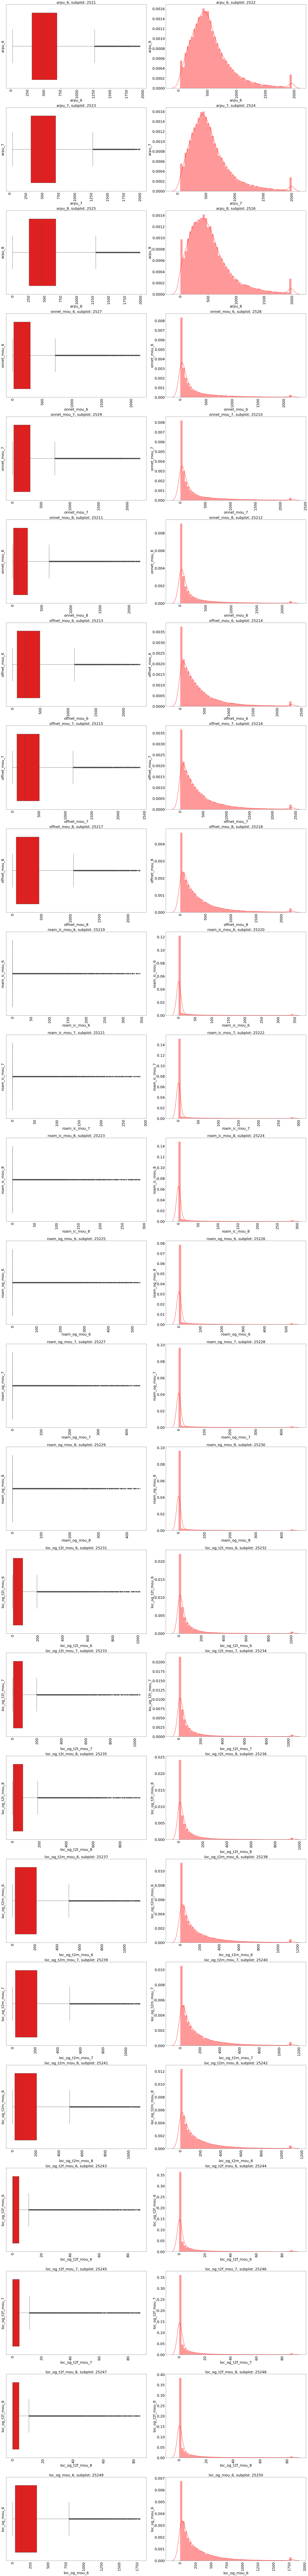

In [48]:
# Cross checking if outliers are removed or not by ploting batch 1 again

# Batch 1
plot_box_dist(0,25,25,filtered_prime)

**Observations** : Now all the outliers are removed

## Visualising the Data
**WRT Churn or not churn**

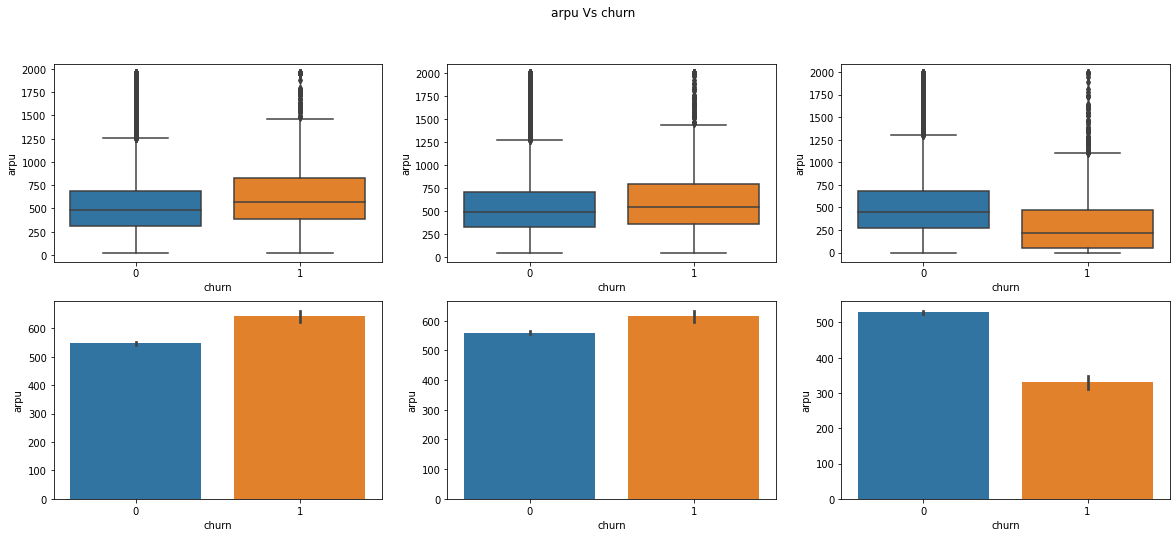

In [49]:
#arpu
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'arpu'
hue_name = '' 
plot_title = 'arpu Vs churn'
x_label = 'churn'
y_label = 'arpu'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

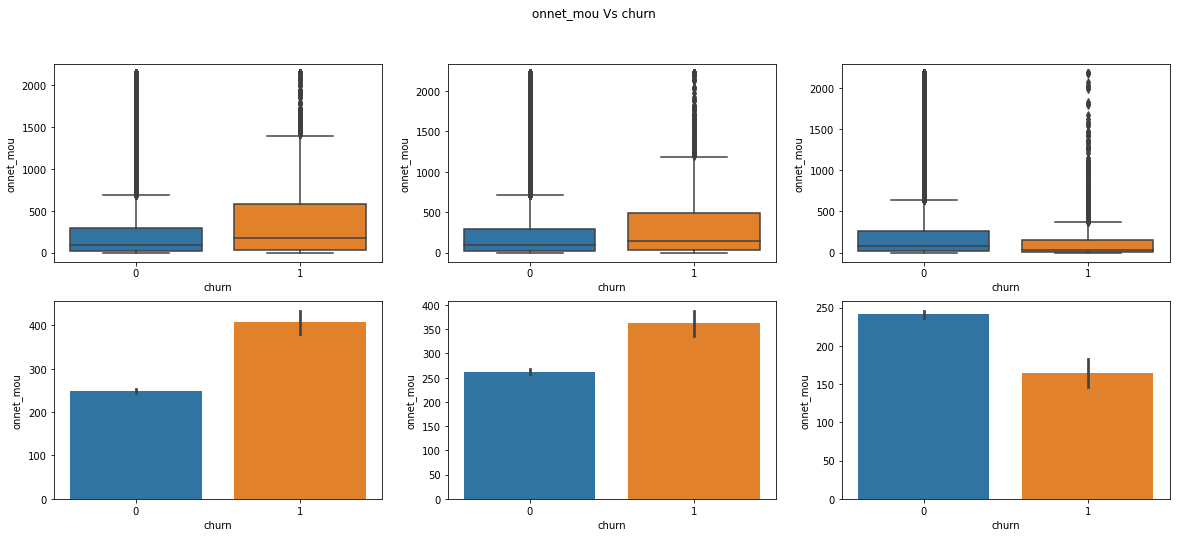

In [50]:
#onnet_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'onnet_mou'
hue_name = '' 
plot_title = 'onnet_mou Vs churn'
x_label = 'churn'
y_label = 'onnet_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

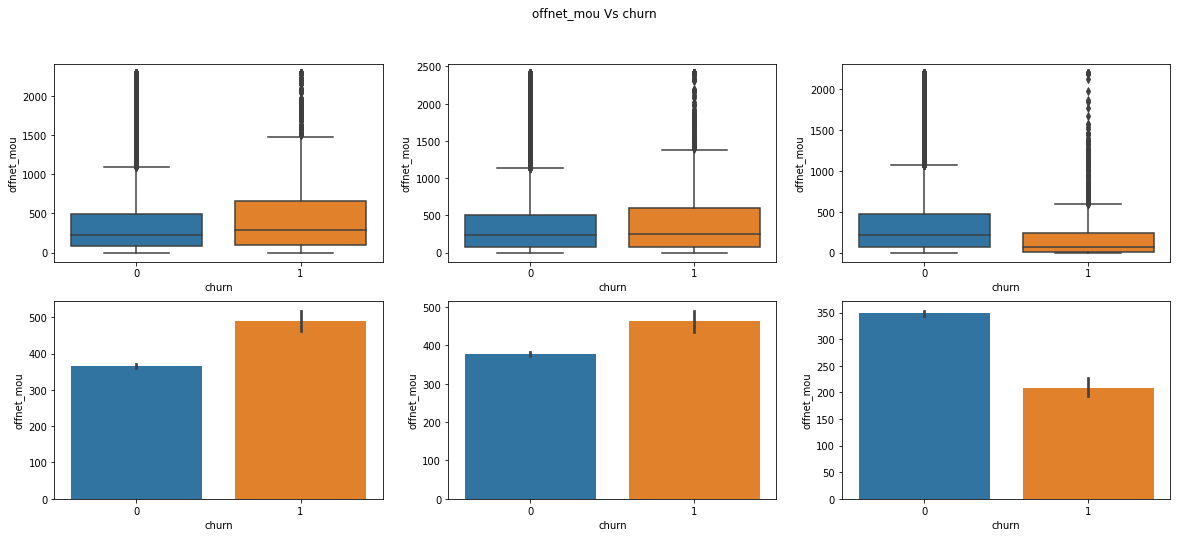

In [51]:
#offnet_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'offnet_mou'
hue_name = '' 
plot_title = 'offnet_mou Vs churn'
x_label = 'churn'
y_label = 'offnet_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

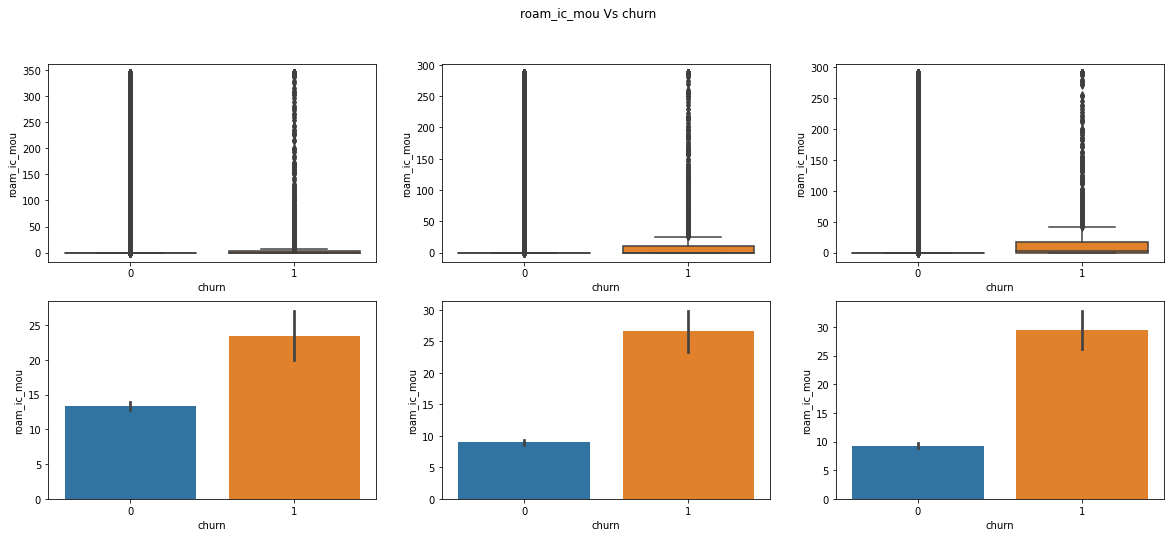

In [52]:
#roam_ic_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'roam_ic_mou'
hue_name = '' 
plot_title = 'roam_ic_mou Vs churn'
x_label = 'churn'
y_label = 'roam_ic_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

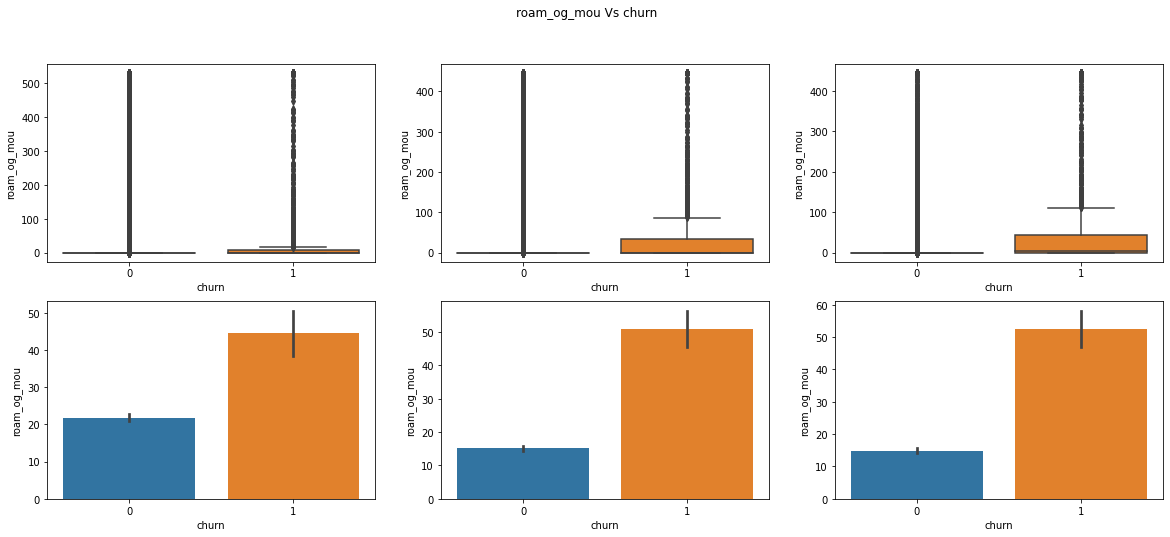

In [53]:
#roam_og_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'roam_og_mou'
hue_name = '' 
plot_title = 'roam_og_mou Vs churn'
x_label = 'churn'
y_label = 'roam_og_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

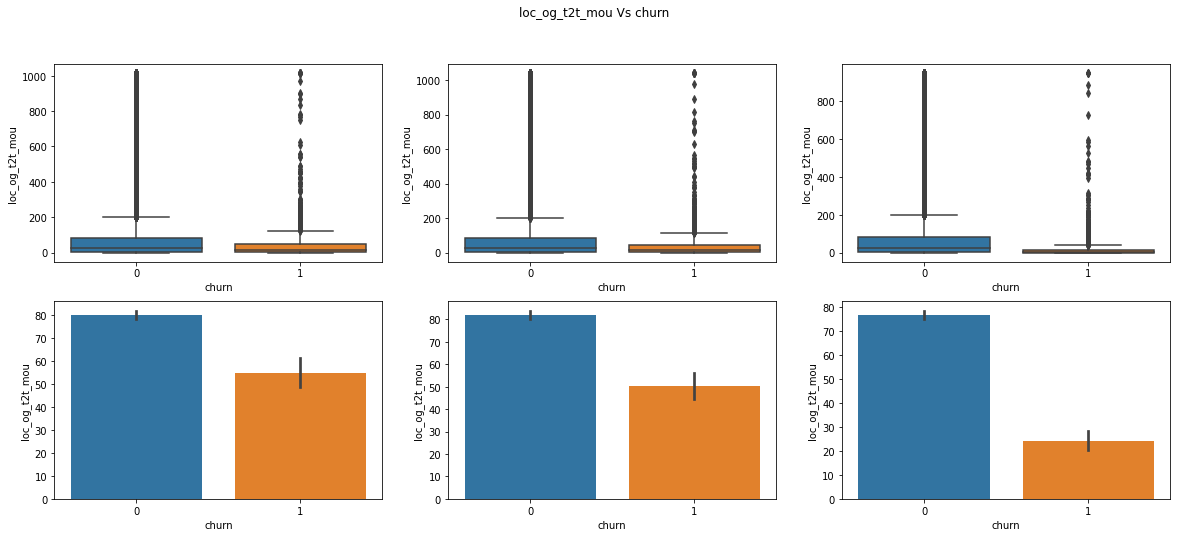

In [54]:
#loc_og_t2t_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_og_t2t_mou'
hue_name = '' 
plot_title = 'loc_og_t2t_mou Vs churn'
x_label = 'churn'
y_label = 'loc_og_t2t_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

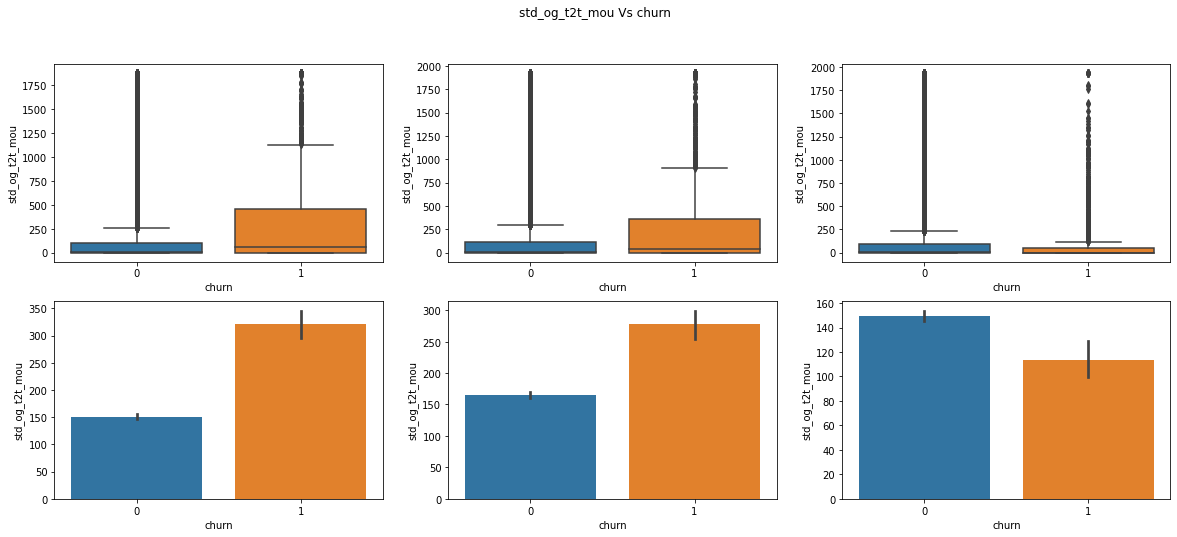

In [55]:
#std_og_t2t_mou
dataframe_name = filtered_prime

x_data = 'churn'
y_data = 'std_og_t2t_mou'
hue_name = '' 
plot_title = 'std_og_t2t_mou Vs churn'
x_label = 'churn'
y_label = 'std_og_t2t_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

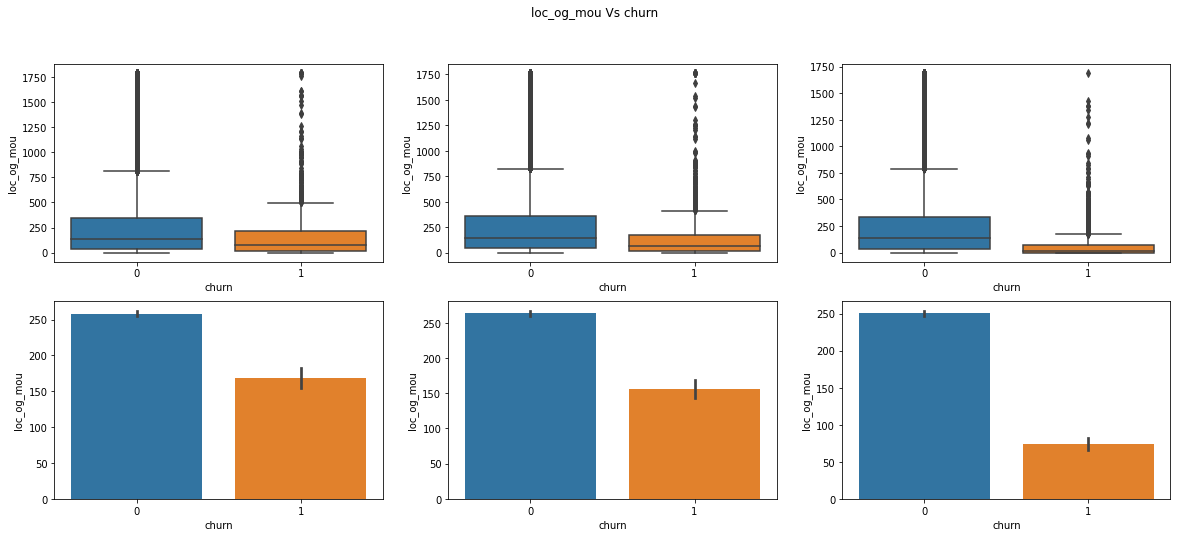

In [56]:
#loc_og_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_og_mou'
hue_name = '' 
plot_title = 'loc_og_mou Vs churn'
x_label = 'churn'
y_label = 'loc_og_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

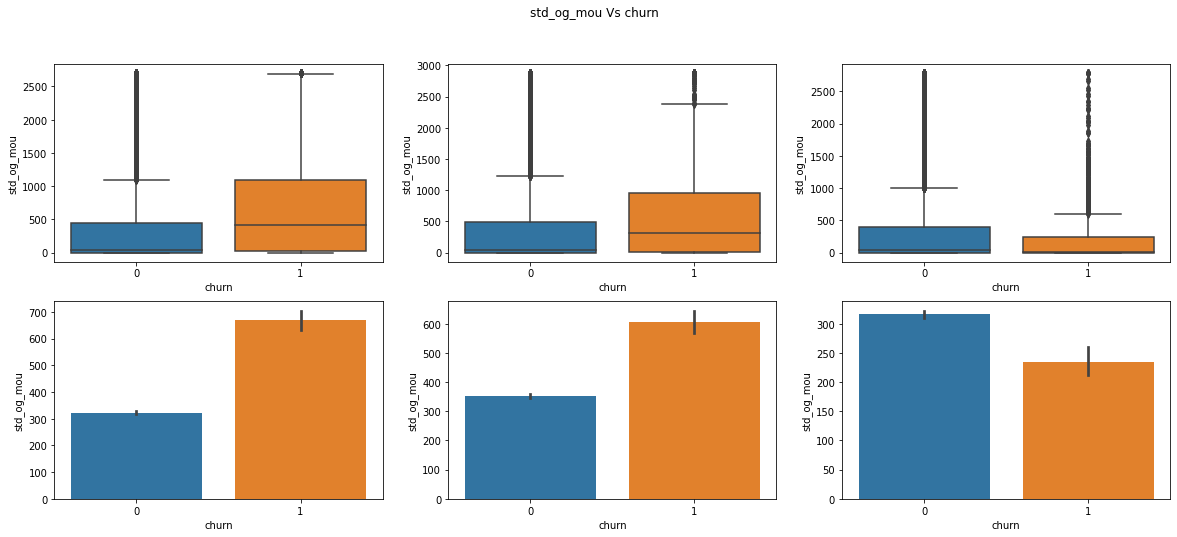

In [57]:
#std_og_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'std_og_mou'
hue_name = '' 
plot_title = 'std_og_mou Vs churn'
x_label = 'churn'
y_label = 'std_og_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

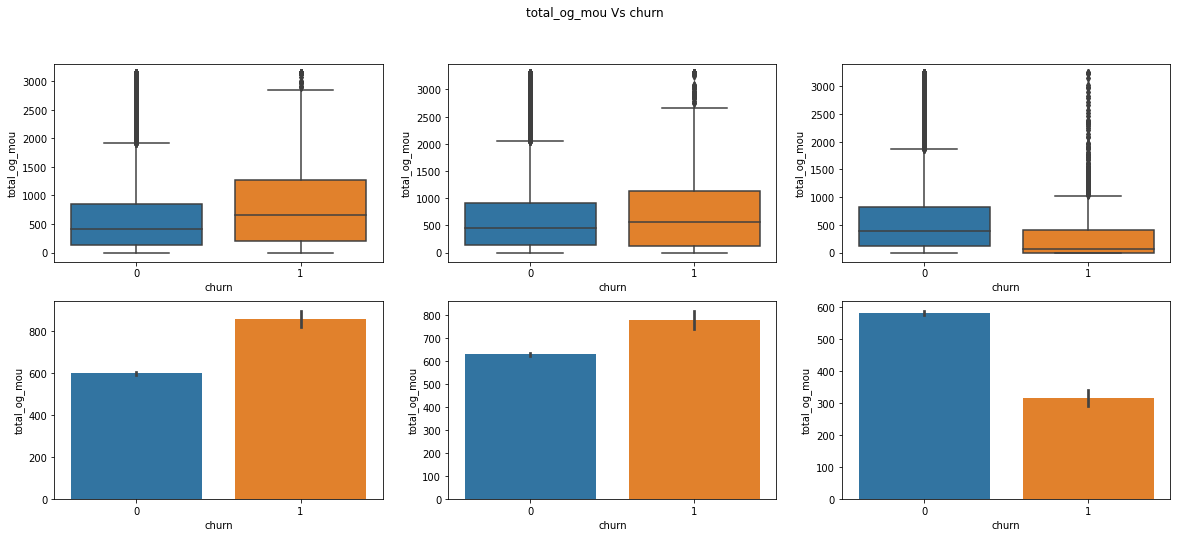

In [58]:
#total_og_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'total_og_mou'
hue_name = '' 
plot_title = 'total_og_mou Vs churn'
x_label = 'churn'
y_label = 'total_og_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

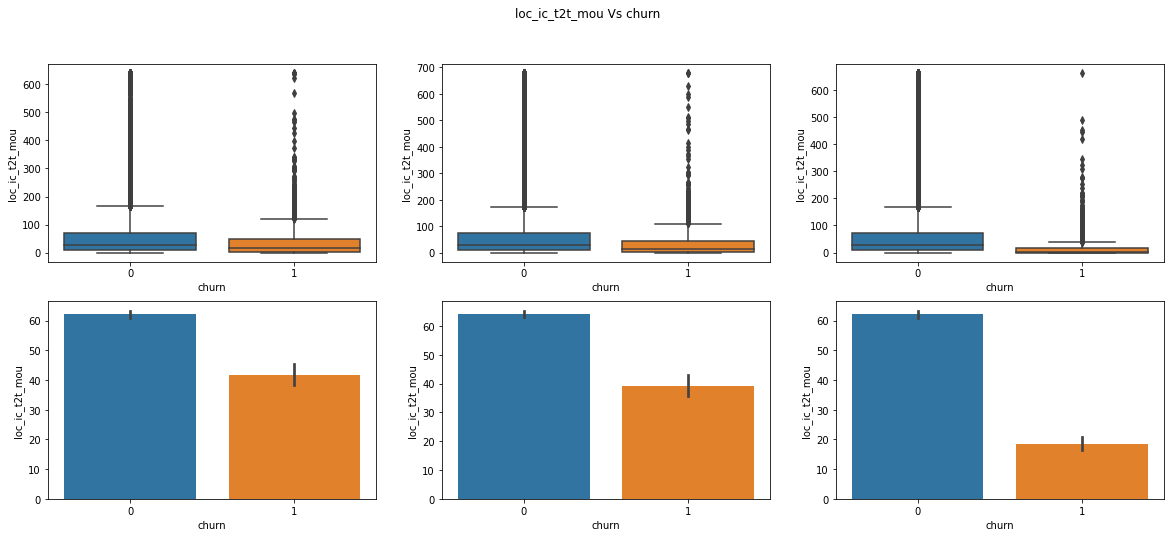

In [59]:
#loc_ic_t2t_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_ic_t2t_mou'
hue_name = '' 
plot_title = 'loc_ic_t2t_mou Vs churn'
x_label = 'churn'
y_label = 'loc_ic_t2t_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

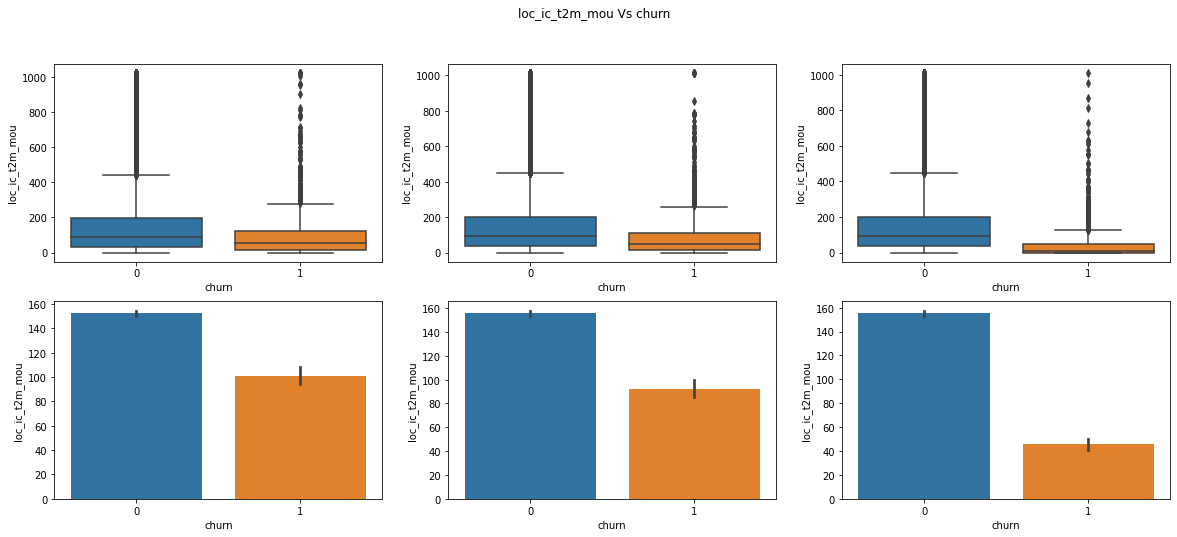

In [60]:
#loc_ic_t2m_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_ic_t2m_mou'
hue_name = '' 
plot_title = 'loc_ic_t2m_mou Vs churn'
x_label = 'churn'
y_label = 'loc_ic_t2m_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

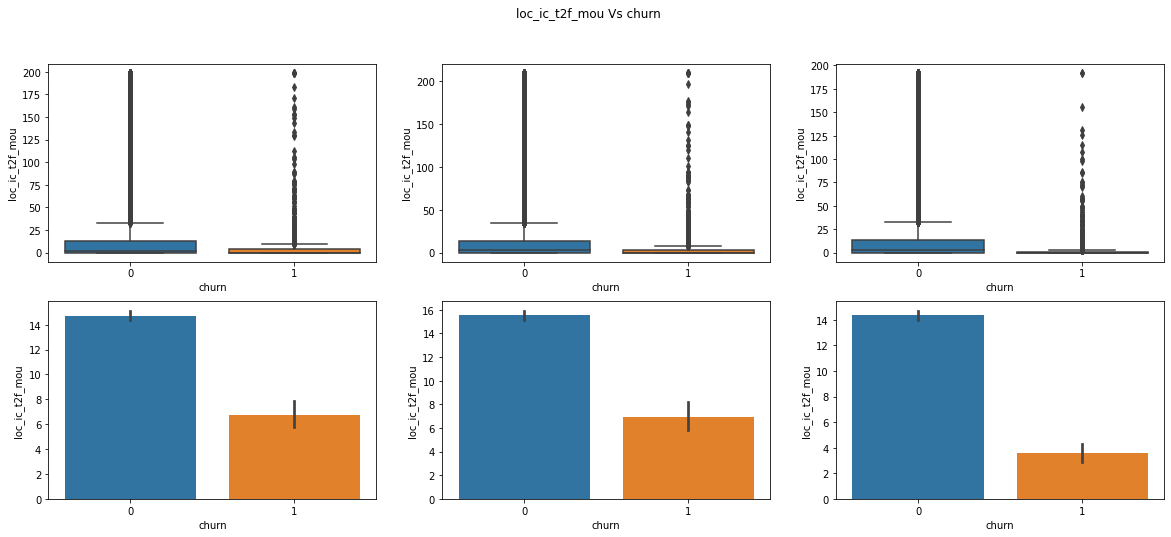

In [61]:
#loc_ic_t2f_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_ic_t2f_mou'
hue_name = '' 
plot_title = 'loc_ic_t2f_mou Vs churn'
x_label = 'churn'
y_label = 'loc_ic_t2f_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

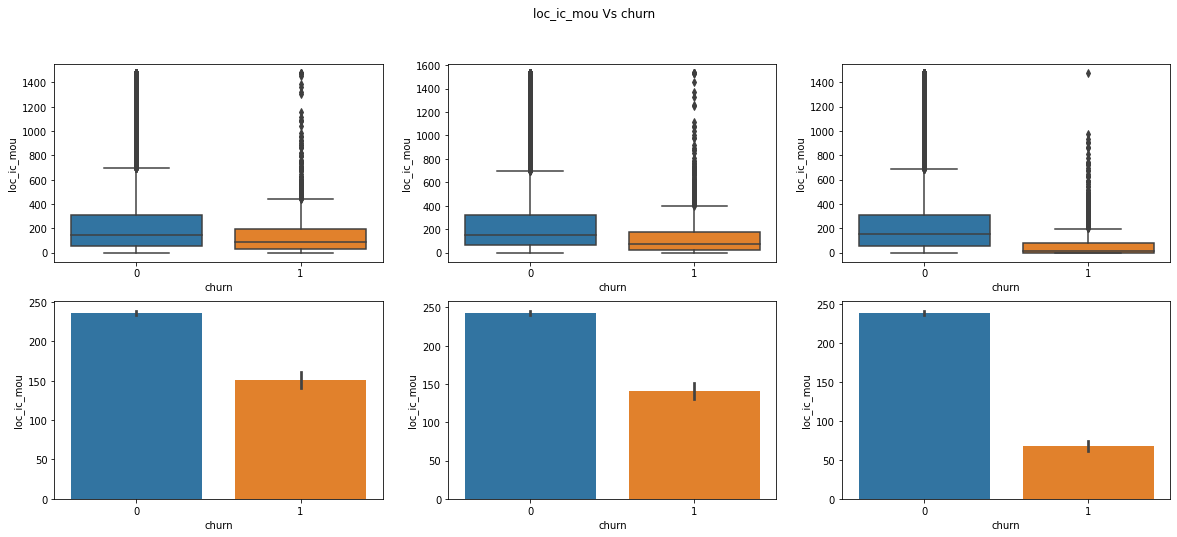

In [62]:
#loc_ic_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'loc_ic_mou'
hue_name = '' 
plot_title = 'loc_ic_mou Vs churn'
x_label = 'churn'
y_label = 'loc_ic_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

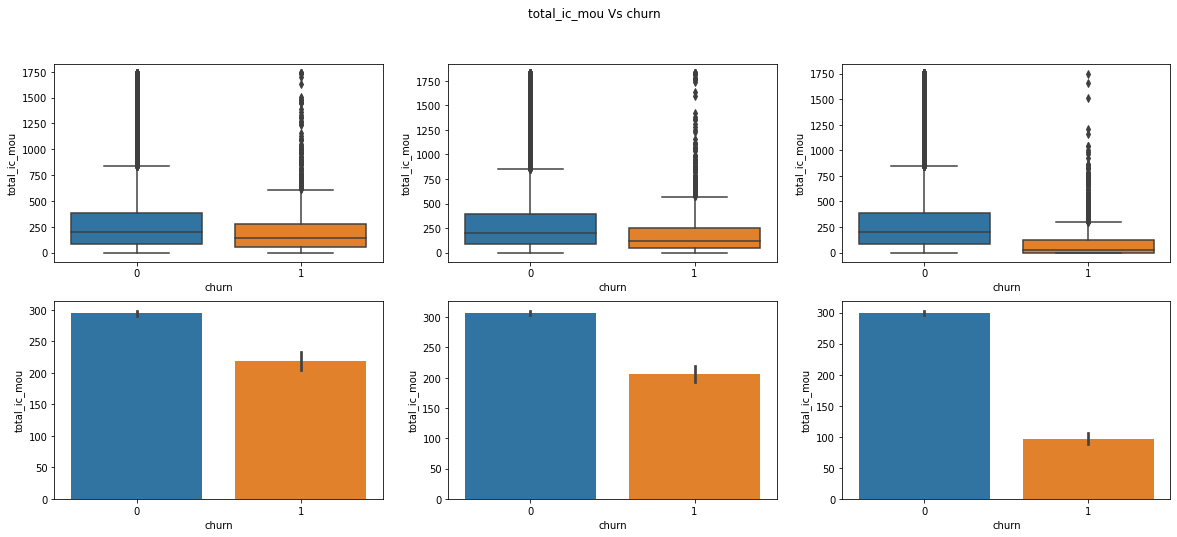

In [63]:
#total_ic_mou
dataframe_name = filtered_prime;

x_data = 'churn'
y_data = 'total_ic_mou'
hue_name = '' 
plot_title = 'total_ic_mou Vs churn'
x_label = 'churn'
y_label = 'total_ic_mou'

variable_type = ''
multirows = 'N'

draw_plot_fn (dataframe_name, x_data, y_data, hue_name, plot_title, x_label, y_label, variable_type, multirows)

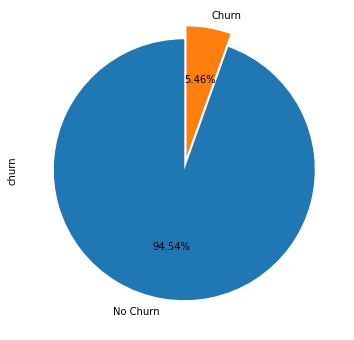

In [64]:
plt.figure(figsize=(10,6))
labels ="No Churn", "Churn"
filtered_prime["churn"].value_counts().plot.pie(explode=[0,0.10], autopct='%1.2f%%',\
                                                    labels=labels, startangle=90)
plt.show()

# Splitting the Data into Training and Testing Sets

Now the next step for regression is performing a train-test split and then scaling the variables

**Handling Data Imbalance**

In [70]:
# As the data is imbalance we will perform oversampling on training data
y = filtered_prime['churn']
X = filtered_prime.drop(['churn'], axis = 1)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X, y)
X = pd.DataFrame(X_train_oversampled, columns=X.columns)
y = y_train_oversampled
print(X.shape)
print(y.shape)

(53250, 96)
(53250,)


In [71]:
# Data holding
from sklearn.model_selection import train_test_split

# y = filtered_prime['churn']
# X = filtered_prime.drop(['churn'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37275, 96)
(37275,)
(15975, 96)
(15975,)


In [72]:
y_test.value_counts()

1    7988
0    7987
Name: churn, dtype: int64

-**Handling Data Imbalance**

In [ ]:
# As the data is imbalance we will perform oversampling on training data

# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 42)
# X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
# X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
# y_train = y_train_oversampled
# print(X_train.shape)
# print(y_train.shape)

In [75]:
# Checking data balance after over sampling
print(pd.DataFrame(y_train).value_counts())

churn
0        18638
1        18637
dtype: int64


**Scaling the data**

In [76]:
# Standardization and Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train.head()

arpu_6      arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  \
39844  537.305910  360.028278   10.444614   171.910858    72.291350   
2708   384.728000  167.813000  175.495000    14.990000     4.680000   
44560  798.364761   76.660104    7.354691    55.983274     8.570284   
23988  616.979000  539.476000  452.437000   581.010000   394.680000   
48687  808.021513  852.261237   81.137738  1057.387347  1055.556227   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
39844     0.201748    251.803638    207.946727     11.503117      66.237371   
2708      3.540000    100.930000     37.110000     41.140000       0.000000   
44560     0.889682   1192.387391     54.178244      6.994296      11.111556   
23988   589.380000    126.730000    219.590000    171.630000       0.000000   
48687    80.642034    846.611706    905.605663     74.849556       8.715524   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
39844      92.637511       6.696916     408.824319     281.934110   
2708        0.000000       0.000000       0.000000       0.000000   
44560       4.034165       7.873989      73.853040      51.466780   
23988       3.400000       0.000000       0.000000       5.480000   
48687       3.418430      14.055247       6.284312       3.212146   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
39844      12.122770          1.196145          0.000000          0.000000   
2708        0.000000         14.990000          4.680000          3.540000   
44560       7.883978         11.442255          0.000000          0.000000   
23988       0.000000        581.010000        388.640000        589.380000   
48687       1.431379        179.909523        183.991165         15.166947   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
39844          0.491873          0.000000          0.000000          0.000000   
2708          94.840000         37.110000         41.140000          0.000000   
44560         29.308111          0.000000          0.000000          0.000000   
23988        126.730000        203.310000         94.490000          0.000000   
48687        126.486824        110.705384          8.993281          1.345606   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  \
39844          0.000000               0.0      1.688018      0.000000   
2708           0.000000               0.0    109.840000     41.790000   
44560          0.000000               0.0     40.760366      0.000000   
23988          3.530000               0.0    707.740000    595.490000   
48687          1.701848               0.0    307.761952    296.415763   

       loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
39844      0.000000          0.000000          0.000000          0.000000   
2708      44.690000          0.000000          0.000000          0.000000   
44560      0.000000         22.000841          0.572614          0.000000   
23988    683.880000          0.000000          4.130000          0.000000   
48687     24.162861        875.751241        870.221580         65.472454   

       std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_8  \
39844         21.354548          0.000000          0.000000               0.0   
2708           6.080000          0.000000          0.000000               0.0   
44560       1073.935595         10.166566          0.000000               0.0   
23988          0.000000          9.160000         72.280000               0.0   
48687        714.201547        789.475309         64.864302               0.0   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_8  \
39844     21.354548      0.000000      0.000000      0.008384          0.00   
2708       6.080000      0.000000      0.000000      0.000000          0.00   
44560   1095.946435     10.739180      0.000000     38.119623          0.00   
23988      0.000000     13.290000

In [77]:
x_train_columns=X_train.columns
x_test_columns=X_test.columns

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=x_train_columns)
X_test = pd.DataFrame(X_test, columns=x_test_columns)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [78]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.264986  0.161742  0.005200     0.080057     0.032555     0.000092   
1  0.185975  0.063464  0.088171     0.006981     0.002108     0.001620   
2  0.400173  0.016858  0.003647     0.026071     0.003859     0.000407   
3  0.306244  0.253493  0.227390     0.270570     0.177737     0.269715   
4  0.405174  0.413417  0.040738     0.492414     0.475349     0.036904   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      0.109738      0.086177      0.005223       0.192092       0.322751   
1      0.043986      0.015379      0.018680       0.000000       0.000000   
2      0.519650      0.022453      0.003176       0.032224       0.014055   
3      0.055230      0.091002      0.077928       0.000000       0.011846   
4      0.368959      0.375301      0.033985       0.025275       0.011910   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       0.023069       0.769602       0.632338       0.027264   
1       0.000000       0.000000       0.000000       0.000000   
2       0.027124       0.139027       0.115433       0.017731   
3       0.000000       0.000000       0.012291       0.000000   
4       0.048417       0.011830       0.007204       0.003219   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0          0.001177          0.000000          0.000000          0.000432   
1          0.014754          0.004494          0.003739          0.083309   
2          0.011262          0.000000          0.000000          0.025745   
3          0.571847          0.373172          0.622543          0.111321   
4          0.177072          0.176668          0.016020          0.111108   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0          0.000000          0.000000          0.000000          0.000000   
1          0.032996          0.037458          0.000000          0.000000   
2          0.000000          0.000000          0.000000          0.000000   
3          0.180769          0.086034          0.000000          0.040072   
4          0.098431          0.008188          0.015261          0.019319   

   loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0               0.0      0.000943      0.000000      0.000000   
1               0.0      0.061333      0.023674      0.026447   
2               0.0      0.022760      0.000000      0.000000   
3               0.0      0.395192      0.337338      0.404706   
4               0.0      0.171850      0.167916      0.014299   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0          0.000000          0.000000          0.000000          0.011049   
1          0.000000          0.000000          0.000000          0.003146   
2          0.011719          0.000298          0.000000          0.555684   
3          0.000000          0.002146          0.000000          0.000000   
4          0.466489          0.452191          0.033836          0.369548   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_6  \
0          0.000000          0.000000               0.0      0.007896   
1          0.000000          0.000000               0.0      0.002248   
2          0.004780          0.000000               0.0      0.405219   
3          0.004306          0.037835               0.0      0.000000   
4          0.371150          0.033953               0.0      0.587874   

   std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_8  total_og_mou_6  \
0      0.000000      0.000000      0.000122       0.00000        0.007334   
1      0.000000      0.000000      0.000000       0.00000        0.036878   
2      0.003730      0.000000      0.555233       0.00000        0.377671   
3      0.004616      0.025949      0.000000       0.06657        0.225138   
4      0.577056      0.046793      0.000000       0.00000        0.603683   

   total_og_mou_7  total

In [79]:
#Sanity Check
print(X_train.shape)
y_train = y_train.values.reshape(-1)
print(y_train.shape)

(37275, 96)
(37275,)


### Now we have two objectives

1. Building a strong predective model to classify churn vs not churn
2. Identify the important features

**We will first build a Logistic Regression Model to identify few important features**
1. We will perform RFE and p-values test for feature selection in the approach
2. After LR we will perform PCA for dimentioanlity reductio and perform tree models on top of it.

## Logistic Regression Model

In [80]:
import statsmodels.api as sm

In [81]:
X_train_sm = sm.add_constant(X_train)
x_train_sm_columns =  x_train_columns.insert(0,'const')
X_train_sm = pd.DataFrame(sm.add_constant(X_train), columns = x_train_sm_columns)

logm1 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37178
Model Family:                Binomial   Df Model:                           96
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12484.
Date:                Sat, 25 Sep 2021   Deviance:                       24967.
Time:                        17:20:30   Pearson chi2:                 2.75e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.7601      0.141     40.836      0.000       5.484       6.037
arpu_6                       1.5205      0.372      4.090      0.000       0.792       2.249
arpu_7                       1.3473      0.394      3.419      0.001       0.575       2.120
arpu_8                       2.0903      0.417      5.016      0.000       1.274       2.907
onnet_mou_6                  1.0869      0.793      1.371      0.170      -0.467       2.641
onnet_mou_7                  2.4298      0.919      2.644      0.008       0.629       4.231
onnet_mou_8                 -5.3171      0.838     -6.347      0.000      -6.959      -3.675
offnet_mou_6                 0.2858      0.742      0.385      0.700      -1.169       1.741
offnet_mou_7                 5.0658      1.066      4.752      0.000       2.976       7.155
offnet_mou_8                -5.5385      0.834     -6.640      0.000      -7.173      -3.904
roam_ic_mou_6               -0.3173      0.229     -1.386      0.166      -0.766       0.131
roam_ic_mou_7                1.0299      0.246      4.188      0.000       0.548       1.512
roam_ic_mou_8               -0.4138      0.214     -1.933      0.053      -0.833       0.006
roam_og_mou_6               -0.2997      0.267     -1.124      0.261      -0.822       0.223
roam_og_mou_7               -0.5020      0.292     -1.719      0.086      -1.074       0.070
roam_og_mou_8                2.8253      0.259     10.917      0.000       2.318       3.333
loc_og_t2t_mou_6             1.6436      0.767      2.143      0.032       0.140       3.147
loc_og_t2t_mou_7            -4.7564      0.804     -5.912      0.000      -6.333      -3.180
loc_og_t2t_mou_8            -2.4058      0.902     -2.668      0.008      -4.173      -0.638
loc_og_t2m_mou_6             0.7559      0.799      0.945      0.344      -0.811       2.323
loc_og_t2m_mou_7            -7.0310      0.819     -8.588      0.000      -8.636      -5.426
loc_og_t2m_mou_8            -1.2984      0.959     -1.354      0.176      -3.178       0.582
loc_og_t2f_mou_6             0.3524      0.265      1.332      0.183      -0.166       0.871
loc_og_t2f_mou_7            -2.2653      0.297     -7.619      0.000      -2.848      -1.683
loc_og_t2f_mou_8             0.9101      0.265      3.434      0.001       0.391       1.430
loc_og_mou_6                -1.6617      1.563     -1.063      0.288      -4.725       1.402
loc_og_mou_7                 6.3272      1.431      4.421      0.000       3.522       9.132
loc_og_mou_8                 8.1898      1.759      4.657      0.000       4.743      11.637
std_og_t2t_mou_6             1.5002      0.786      1.908      0.056      -0.041       3.041
std_og_t2t_mou_7            -2.7378      0.848     -3.228      0.001      -4.400      -1.076
std_og_t2t_mou

In [82]:
# Few features has the p-value > 0.5; we will remove them using RFE and select top 40 features from 96 available
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 40)
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
print(len(col))
col

40


Index(['arpu_7', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6',
       'std_ic_t2m_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'date_of_last_rech_8',
       'last_day_rch_amt_8', 'vol_3g_mb_6', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'total_data_rech_amt_7'],
      dtype='object')

In [83]:
# Storing the result afteh RFE in new dataframe for further processing
X_train_RFE = X_train[col]
X_test_RFE = X_test[col]

x_train_sm_columns =  col.insert(0,'const')
X_train_sm = pd.DataFrame(sm.add_constant(X_train_RFE), columns = x_train_sm_columns)

#building second LGR model with filtered features
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37234
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12873.
Date:                Sat, 25 Sep 2021   Deviance:                       25746.
Time:                        17:21:50   Pearson chi2:                 2.11e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.4901      0.089     50.360      0.000       4.315       4.665
arpu_7                    1.5851      0.204      7.756      0.000       1.185       1.986
onnet_mou_7               1.7898      0.593      3.020      0.003       0.628       2.951
onnet_mou_8              -4.4357      0.328    -13.534      0.000      -5.078      -3.793
offnet_mou_7              3.1184      0.559      5.583      0.000       2.024       4.213
offnet_mou_8             -4.4936      0.321    -14.011      0.000      -5.122      -3.865
roam_og_mou_8             2.4994      0.136     18.352      0.000       2.233       2.766
loc_og_t2t_mou_7         -4.4165      0.560     -7.882      0.000      -5.515      -3.318
loc_og_t2m_mou_7         -6.2964      0.579    -10.882      0.000      -7.430      -5.162
loc_og_t2f_mou_7         -1.3145      0.181     -7.265      0.000      -1.669      -0.960
loc_og_mou_7              5.9112      0.830      7.119      0.000       4.284       7.539
std_og_t2t_mou_6          0.8393      0.116      7.225      0.000       0.612       1.067
std_og_t2t_mou_7         -1.7169      0.505     -3.397      0.001      -2.707      -0.726
std_og_t2m_mou_7         -1.7896      0.474     -3.779      0.000      -2.718      -0.861
std_og_mou_8              2.7546      0.363      7.590      0.000       2.043       3.466
loc_ic_t2t_mou_6          3.6319      0.494      7.359      0.000       2.665       4.599
loc_ic_t2t_mou_8         -1.6908      0.319     -5.295      0.000      -2.317      -1.065
loc_ic_t2m_mou_6          6.0437      0.731      8.264      0.000       4.610       7.477
loc_ic_t2m_mou_8         -3.6327      0.365     -9.954      0.000      -4.348      -2.917
loc_ic_t2f_mou_8         -0.6193      0.244     -2.533      0.011      -1.098      -0.140
loc_ic_mou_6             -6.4241      0.977     -6.575      0.000      -8.339      -4.509
std_ic_t2m_mou_8         -1.5697      0.213     -7.355      0.000      -1.988      -1.151
total_ic_mou_7            2.8157      0.250     11.265      0.000       2.326       3.306
total_ic_mou_8           -3.2560      0.462     -7.051      0.000      -4.161      -2.351
spl_ic_mou_8             -2.6277      0.169    -15.513      0.000      -2.960      -2.296
total_rech_num_8         -1.9461      0.133    -14.651      0.000      -2.206      -1.686
total_rech_amt_8          2.3966      0.231     10.390      0.000       1.944       2.849
date_of_last_rech_8      -3.7479      0.099    -38.014      0.000      -3.941      -3.555
last_day_rch_amt_8       -4.3411      0.141    -30.718      0.000      -4.618      -4.064
vol_3g_mb_6               2.1303      0.170     12.528      0.000       1.797       2.464
monthly_2g_6             -2.5645      0.162    -15.788      0.000      -2.883      -2.246
monthly_2g_7           

**Lets Evaluate the model with selected 40 features using RFE**

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()

model.fit(X_train[col], y_train)

# y_train_pred = model.predict(X_train[col])
# y_test_pred = model.predict(X_test[col])

# result_df = {}
# result_df['y_train_pred'] =  y_train_pred
# result_df['y_test_pred'] = y_test_pred
# result_df['y_train'] = y_train
# result_df['y_test'] = y_test

# print("Training Accuracy: ", metrics.accuracy_score(y_train_pred, y_train))
# print("Testing Accuracy: ", metrics.accuracy_score(y_test_pred, y_test))

# Predictions on train dataset
pred_train = model.predict_proba(X_train[col])
y_pred_train = model.predict(X_train[col])

# Predictions on test dataset
pred_test = model.predict_proba(X_test[col])
y_pred_test = model.predict(X_test[col])

In [85]:
print(confusion_matrix(y_train, y_pred_train))
print("Accuracy Score in train dataset:", accuracy_score(y_train, y_pred_train))
print("Accuracy Score in test dataset:", accuracy_score(y_test, y_pred_test))

[[15722  2916]
 [ 2264 16373]]
Accuracy Score in train dataset: 0.8610328638497653
Accuracy Score in test dataset: 0.865414710485133


In [86]:
y_pred_df = pd.DataFrame(pred_train)
y_pred_df_test = pd.DataFrame(pred_test)

y_pred = y_pred_df.iloc[:,[1]]
y_pred_test = y_pred_df_test.iloc[:,[1]]

y_pred.reset_index(drop=True, inplace=True)
y_train_df = pd.DataFrame(y_train)
y_train_df.reset_index(drop=True, inplace=True)
y_pred_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_train_df, y_pred], axis=1)
y_pred_final_test = pd.concat([y_test, y_pred_test], axis=1)
 
y_pred_final = y_pred_final.rename(columns = {0:'churn', 1 : "churn_prob"}) #Renaming the column
y_pred_final_test = y_pred_final_test.rename(columns = { 1 : "churn_prob"})

In [87]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score )
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

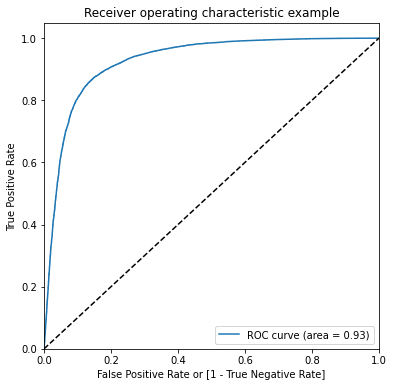

(array([0.        , 0.        , 0.        , ..., 0.99989269, 0.99994635,
        1.        ]),
 array([0.00000000e+00, 5.36567044e-05, 1.07313409e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99986627e+00, 9.99866269e-01, 9.99866104e-01, ...,
        2.23760043e-07, 2.20656422e-07, 3.99474685e-08]))

In [88]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [89]:
y_pred_final

churn  churn_prob
0          1    0.945384
1          0    0.122982
2          1    0.849645
3          0    0.354789
4          1    0.931529
...      ...         ...
37270      0    0.057282
37271      1    0.994859
37272      0    0.367645
37273      0    0.053567
37274      0    0.041961

[37275 rows x 2 columns]

In [90]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i] = y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)

In [91]:
# Let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499987  0.000000  1.000000
0.1   0.1  0.745030  0.505473  0.984601
0.2   0.2  0.799866  0.634081  0.965660
0.3   0.3  0.831898  0.719551  0.944251
0.4   0.4  0.849846  0.784955  0.914739
0.5   0.5  0.861033  0.843545  0.878521
0.6   0.6  0.858833  0.884000  0.833664
0.7   0.7  0.840966  0.918393  0.763535
0.8   0.8  0.794420  0.946293  0.642539
0.9   0.9  0.684561  0.973710  0.395396


<AxesSubplot:xlabel='prob'>

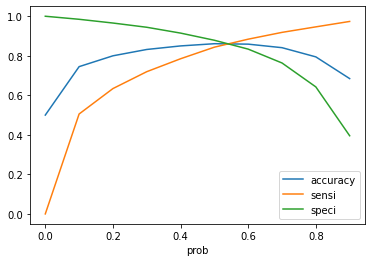

In [92]:
# Let's plot accuracy vs. sensitivity vs. specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [93]:
# Creating new column 'pred_churn' with 1 if churn_prob > 0.52 else 0
y_pred_final["pred_churn"] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.50 else 0)

y_pred_final.churn.value_counts()

0    18638
1    18637
Name: churn, dtype: int64

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.pred_churn)
confusion

array([[15722,  2916],
       [ 2264, 16373]], dtype=int64)

In [95]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print("Accuracy Score: ", accuracy_score(y_train, y_pred_final["pred_churn"]))
print("Sensitivity: ", TP/float(TP+FN))
print("Specificity: ", TN/float(TN+FP))
print("False Postive Rate: ", FP/float(TN+FP))
print("Positive Predictive Value: ", TP/float(TP+FP))
print("Negative Predictive Value: ",TN/float(TN+ FN))
print("Misclassification Rate: ", (FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8610328638497653
Sensitivity:  0.8785212212265923
Specificity:  0.8435454447902135
False Postive Rate:  0.15645455520978646
Positive Predictive Value:  0.8488257556120068
Negative Predictive Value:  0.8741243189147114
Misclassification Rate:  0.13896713615023473


In [96]:
# Churn prediction in test dataset
y_pred_final_test["pred_churn"] = y_pred_final_test.churn_prob.map( lambda x: 1 if x > 0.50 else 0)
confusion = metrics.confusion_matrix(y_pred_final_test.churn, y_pred_final_test.pred_churn)

TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print("Accuracy Score: ", accuracy_score(y_test, y_pred_final_test["pred_churn"]))
print("Sensitivity: ", TP/float(TP+FN))
print("Specificity: ", TN/float(TN+FP))
print("False Postive Rate: ", FP/float(TN+FP))
print("Positive Predictive Value: ", TP/float(TP+FP))
print("Negative Predictive Value: ",TN/float(TN+ FN))
print("Misclassification Rate: ", (FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.865414710485133
Sensitivity:  0.8864546820230346
Specificity:  0.8443721046700889
False Postive Rate:  0.15562789532991111
Positive Predictive Value:  0.8506727534839019
Negative Predictive Value:  0.8814534047836884
Misclassification Rate:  0.13458528951486698


In [97]:
# Identifying few top features
top_features = {
}

top_features['features'] = col
top_features['coeff'] = model.coef_[0]

In [98]:
top_features = pd.DataFrame(top_features)

print(top_features.sort_values(by='coeff')[:10])
print("\n")
print(top_features.sort_values(by='coeff', ascending=False)[:10])

               features     coeff
31         monthly_2g_8 -5.072131
36         monthly_3g_8 -4.444860
27   last_day_rch_amt_8 -4.165227
37          sachet_3g_8 -3.757528
26  date_of_last_rech_8 -3.665611
17     loc_ic_t2m_mou_8 -3.655207
7      loc_og_t2m_mou_7 -3.584562
4          offnet_mou_8 -3.456890
2           onnet_mou_8 -3.348784
33          sachet_2g_8 -3.162556


                 features     coeff
39  total_data_rech_amt_7  4.164397
16       loc_ic_t2m_mou_6  2.867079
21         total_ic_mou_7  2.380803
5           roam_og_mou_8  2.376997
9            loc_og_mou_7  2.375424
3            offnet_mou_7  2.030064
28            vol_3g_mb_6  1.988139
25       total_rech_amt_8  1.893273
0                  arpu_7  1.852941
13           std_og_mou_8  1.576395


### Model Building using PCA

**Now from here onward we will try to improve the model using feature selection, ensembling and PCA**

### PCA on the data

In [99]:
pca = PCA(svd_solver = "randomized", random_state = 50)

In [100]:
# Performing PCA on X_train
pca.fit(X_train)

PCA(random_state=50, svd_solver='randomized')

In [101]:
pca.components_

array([[ 0.16547003,  0.17577783,  0.11641638, ..., -0.05529011,
        -0.06136934, -0.05731111],
       [ 0.06329928,  0.09760881,  0.16955213, ...,  0.06373931,
         0.01329284,  0.01577137],
       [-0.04910969, -0.02486835,  0.04056028, ...,  0.03529096,
         0.0227013 ,  0.02759864],
       ...,
       [-0.00225077,  0.01993478, -0.00754262, ...,  0.00024102,
         0.00246726, -0.00342936],
       [ 0.00487609, -0.00220902, -0.00546025, ...,  0.00035731,
        -0.00190165, -0.00068664],
       [-0.00484732,  0.00078812,  0.00097833, ..., -0.00036435,
        -0.00049813,  0.00113344]])

In [102]:
pca.explained_variance_ratio_

array([1.73659661e-01, 1.33172738e-01, 6.36943340e-02, 5.97098328e-02,
       5.33316786e-02, 4.68584722e-02, 3.73181875e-02, 2.93319971e-02,
       2.58687609e-02, 2.33969702e-02, 2.04327697e-02, 1.82605546e-02,
       1.75010369e-02, 1.67936520e-02, 1.59837835e-02, 1.46105444e-02,
       1.39195502e-02, 1.29219492e-02, 1.24719586e-02, 1.18853486e-02,
       1.06325663e-02, 9.87716087e-03, 9.34018340e-03, 9.20362002e-03,
       8.32490822e-03, 7.49623357e-03, 7.23259947e-03, 6.79151389e-03,
       6.47619436e-03, 5.97434884e-03, 5.92926247e-03, 5.61480376e-03,
       5.52718590e-03, 5.27333650e-03, 5.22770823e-03, 5.15297948e-03,
       4.76918973e-03, 4.57269425e-03, 4.43887906e-03, 4.38961040e-03,
       4.24319527e-03, 3.95807355e-03, 3.73575842e-03, 3.67971293e-03,
       3.20025278e-03, 3.09912404e-03, 2.97248285e-03, 2.67486975e-03,
       2.56489251e-03, 2.41406294e-03, 2.24705594e-03, 2.10386959e-03,
       2.03515356e-03, 1.91953167e-03, 1.85057203e-03, 1.70388572e-03,
      

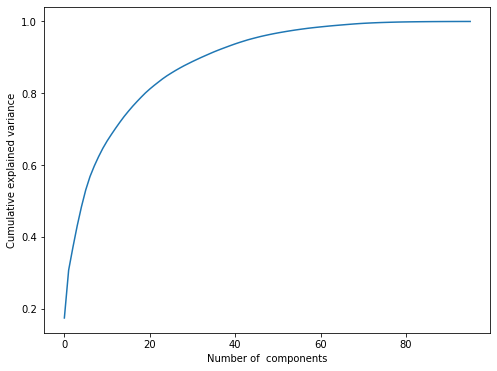

In [103]:
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of  components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [104]:
pca_final = IncrementalPCA(n_components=25) # 25 components are enough to explain >90% variance

X_train_pca = pca_final.fit_transform(X_train) # PCA on train dataset
X_train_pca.shape

(37275, 25)

In [105]:
# Maximum and minimum correlations after PCA
corr = np.corrcoef(X_train_pca.transpose())
corr_nodiag = corr - np.diagflat(corr.diagonal())
print("max_corr:", corr_nodiag.max(), "and", "min_corr:", corr_nodiag.min(),)

max_corr: 0.0022376206248565828 and min_corr: -0.007918280850844643


**Observations** : We can notice that after PCA we dont have any multicolinearity

In [106]:
# PCA on test data
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(15975, 25)

# Random Forest with PCA

In [107]:
# We will first perform it without hyper-parameter tuning
rf_balanced = RandomForestClassifier(class_weight="balanced_subsample", n_estimators = 1000, max_depth = 6, min_samples_split=5)

In [108]:
trained_rf = rf_balanced.fit(X_train_pca, y_train)

In [109]:
pred_rf_train = trained_rf.predict(X_train_pca)
pred_rf_test = trained_rf.predict(X_test_pca)
pred_prob_rf_train = trained_rf.predict_proba(X_train_pca)[:,1]
pred_prob_rf_test = trained_rf.predict_proba(X_test_pca)[:,1]

accuracy_train = metrics.accuracy_score(y_train, pred_rf_train)
accuracy_test = metrics.accuracy_score(y_test, pred_rf_test)

print("Accuracy in train dataset:", accuracy_train)
print("Accuracy in test dataset:", accuracy_test)

print("Classification report on train dataset:", "\n", classification_report(y_train, pred_rf_train))
print("Classification report on test dataset:", "\n", classification_report(y_test, pred_rf_test)) 

Accuracy in train dataset: 0.8441851106639839
Accuracy in test dataset: 0.8400625978090767
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85     18638
           1       0.85      0.83      0.84     18637

    accuracy                           0.84     37275
   macro avg       0.84      0.84      0.84     37275
weighted avg       0.84      0.84      0.84     37275

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      7987
           1       0.85      0.82      0.84      7988

    accuracy                           0.84     15975
   macro avg       0.84      0.84      0.84     15975
weighted avg       0.84      0.84      0.84     15975



ROC AUC in train dataset 0.921585122572923


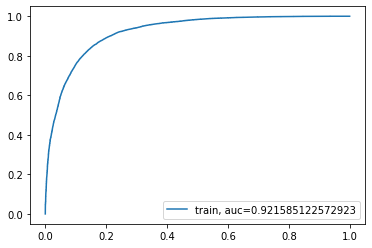

In [110]:
# ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_rf_train)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in train dataset 0.9178187432645148


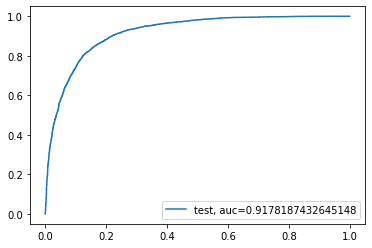

In [111]:
# ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_rf_test)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

# Random Forest with PCA and hyper-parameter tuning

In [112]:
rf_tuned = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2, 3, 4, 5],
    'n_estimators': [10, 30, 50, 75, 100, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [113]:
%%time
grid_search.fit(X_train_pca,y_train)

Fitting 4 folds for each of 600 candidates, totalling 2400 fits
Wall time: 1h 20min 42s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 75, 100, 200]},
             scoring='accuracy', verbose=1)

In [114]:
print(grid_search.best_estimator_,"\n\n")
dt_best = grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42) 




In [115]:
preds_train = dt_best.predict(X_train_pca)
preds_test = dt_best.predict(X_test_pca)

pred_prob_train = dt_best.predict_proba(X_train_pca)[:,1]
pred_prob_test = dt_best.predict_proba(X_test_pca)[:,1]

In [116]:
accuracy_train_rf_all = metrics.accuracy_score(y_train, preds_train)
accuracy_test_rf_all = metrics.accuracy_score(y_test, preds_test)

print("Accuracy in the train dataset:", accuracy_train_rf_all)
print("Accuracy in the test dataset:", accuracy_test_rf_all)

print("Classification report on train dataset:", "\n", classification_report(y_train, preds_train))
print("Classification report on test dataset:", "\n", classification_report(y_test, preds_test))

Accuracy in the train dataset: 0.9782696177062374
Accuracy in the test dataset: 0.9386541471048513
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     18638
           1       0.97      0.99      0.98     18637

    accuracy                           0.98     37275
   macro avg       0.98      0.98      0.98     37275
weighted avg       0.98      0.98      0.98     37275

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      7987
           1       0.92      0.96      0.94      7988

    accuracy                           0.94     15975
   macro avg       0.94      0.94      0.94     15975
weighted avg       0.94      0.94      0.94     15975



ROC AUC in train dataset 0.9980139764573681


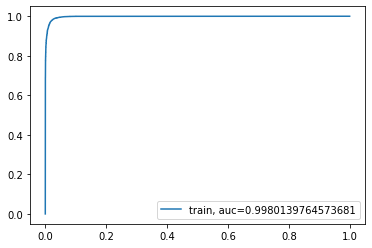

In [117]:
# ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_train)
auc_train_rf_all = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc_train_rf_all)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc_train_rf_all))
plt.legend(loc = 4)

ROC AUC in test dataset 0.9808772097673242


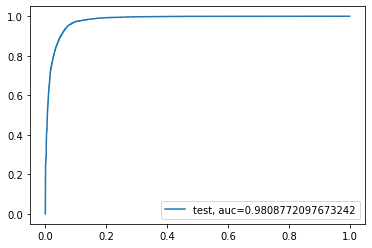

In [118]:
# ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_test)
auc_test_rf_all = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc_test_rf_all)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc_test_rf_all))
plt.legend(loc = 4)

# Random Forest with selected features and hyper-parameter tuning

In [119]:
rf_all = RandomForestClassifier(class_weight="balanced", max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [120]:
trained_rf_all = rf_all.fit(X_train[col], y_train)

In [121]:
preds_train = trained_rf_all.predict(X_train[col])
preds_test = trained_rf_all.predict(X_test[col])

pred_prob_train = trained_rf_all.predict_proba(X_train[col])[:,1]
pred_prob_test = trained_rf_all.predict_proba(X_test[col])[:,1]

In [122]:
accuracy_train_rf_all = metrics.accuracy_score(y_train, preds_train)
accuracy_test_rf_all = metrics.accuracy_score(y_test, preds_test)

print("Accuracy in the train dataset:", accuracy_train_rf_all)
print("Accuracy in the test dataset:", accuracy_test_rf_all)

print("Classification report on train dataset:", "\n", classification_report(y_train, preds_train))
print("Classification report on test dataset:", "\n", classification_report(y_test, preds_test))

Accuracy in the train dataset: 0.9814621059691482
Accuracy in the test dataset: 0.9577464788732394
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     18638
           1       0.97      0.99      0.98     18637

    accuracy                           0.98     37275
   macro avg       0.98      0.98      0.98     37275
weighted avg       0.98      0.98      0.98     37275

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      7987
           1       0.95      0.97      0.96      7988

    accuracy                           0.96     15975
   macro avg       0.96      0.96      0.96     15975
weighted avg       0.96      0.96      0.96     15975



In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test, preds_test))
confusion = confusion_matrix(y_test, preds_test)

print(confusion)

TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

print("TP : ", TP)
print("FP : ", FP)
print("TN : ", TN)
print("FN : ", FN)

0.9577464788732394
[[7585  402]
 [ 273 7715]]
TP :  7715
FP :  402
TN :  7585
FN :  273


ROC AUC in train dataset 0.9974117074437948


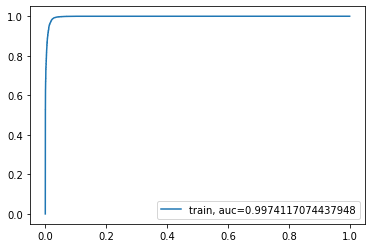

In [124]:
# ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_train)
auc_train_rf_all = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc_train_rf_all)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc_train_rf_all))
plt.legend(loc = 4)

ROC AUC in test dataset 0.9886717675110387


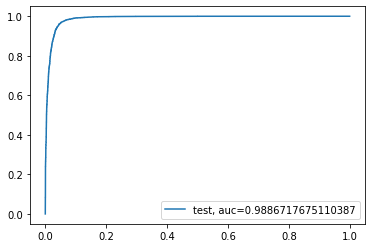

In [125]:
# ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_test)
auc_test_rf_all = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc_test_rf_all)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc_test_rf_all))
plt.legend(loc = 4)

# XGBoosting

In [126]:
xgboost = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.001, n_jobs=-1, max_depth=6, colsample_bytree=1, gamma=0.1,
                            cv = None, scoring="f1_weighted", reg_alpha=0, reg_lambda=1, eval_metric="auc",
                           objective="binary:hinge", booster = "gbtree", tree_method = "exact", min_child_weight = 15)

xgb_model = xgboost.fit(X_train[col], y_train)

[18:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scoring" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [127]:
preds_train = xgb_model.predict(X_train[col])
preds_test = xgb_model.predict(X_test[col])

accuracy_train = metrics.accuracy_score(y_train, preds_train)
accuracy_test = metrics.accuracy_score(y_test, preds_test)

print("Accuracy in the train dataset:", accuracy_train)
print("Accuracy in the test dataset:", accuracy_test)

print("Classification report on train dataset:", "\n", classification_report(y_train, preds_train))
print("Classification report on test dataset:", "\n", classification_report(y_test, preds_test))

Accuracy in the train dataset: 0.886653252850436
Accuracy in the test dataset: 0.8855712050078247
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.97      0.79      0.88     18638
           1       0.83      0.98      0.90     18637

    accuracy                           0.89     37275
   macro avg       0.90      0.89      0.89     37275
weighted avg       0.90      0.89      0.89     37275

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.80      0.87      7987
           1       0.83      0.98      0.90      7988

    accuracy                           0.89     15975
   macro avg       0.90      0.89      0.88     15975
weighted avg       0.90      0.89      0.88     15975



# XGBoosting with hyper parameter tuning

In [128]:
from sklearn.model_selection import RandomizedSearchCV

# defining XGBoost Model
xgb_model = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

In [129]:
# params = {
#         'n_estimators' : [100, 200, 500, 750], # no of trees 
#         'learning_rate' : [0.01, 0.02, 0.18],  # eta
#         'min_child_weight': [1, 5, 7, 10],
#         'gamma': [0.1, 0.5, 1, 2.5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5, 10]
#         }


# After performing HPT the following are the best params
params = {
        'n_estimators' : [750], # no of trees 
        'learning_rate' : [0.18],  # eta
        'min_child_weight': [1],
        'gamma': [0.1],
        'subsample': [0.8],
        'colsample_bytree': [0.6],
        'max_depth': [10]
        }
folds = 3

param_comb = 800

random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)


In [130]:

xg_hpt = random_search.fit(X_train[col], y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[19:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [131]:
print('\n Best estimator:')
print(xg_hpt.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(xg_hpt.best_score_ )
print('\n Best hyperparameters:')
print(xg_hpt.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.18, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best accuracy for 3-fold search with 800 parameter combinations:
0.9736284372904092

 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 750, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.18, 'gamma': 0.1, 'colsample_bytree': 0.6}


In [132]:
preds_test = random_search.predict(X_test[col])
print('Accuracy Score: ', accuracy_score(y_test, preds_test))

print("Classification report on test dataset:", "\n", classification_report(y_test, preds_test))

Accuracy Score:  0.9755242566510172
Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      7987
           1       0.97      0.98      0.98      7988

    accuracy                           0.98     15975
   macro avg       0.98      0.98      0.98     15975
weighted avg       0.98      0.98      0.98     15975



In [133]:
y_test.value_counts()

churn
1        7988
0        7987
dtype: int64

In [134]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [136]:
importances = xg_hpt.best_estimator_.feature_importances_
cols = X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(cols)), reverse=True), columns={'col_name','importance'})
# Top 20 features
sorted_feature_importance.head(20) 

importance          col_name
0     0.227103       onnet_mou_8
1     0.143331  std_og_t2m_mou_7
2     0.088619      std_og_mou_8
3     0.066015      loc_og_mou_8
4     0.050737  std_og_t2m_mou_6
5     0.041107  std_og_t2t_mou_6
6     0.036081  std_og_t2t_mou_8
7     0.029791  loc_og_t2f_mou_7
8     0.029711  loc_og_t2f_mou_8
9     0.024325  std_og_t2f_mou_8
10    0.023746      loc_og_mou_7
11    0.020273      std_og_mou_7
12    0.014575      std_og_mou_6
13    0.014084      spl_og_mou_6
14    0.013315  std_og_t2t_mou_7
15    0.012104     roam_ic_mou_8
16    0.010033  loc_og_t2t_mou_8
17    0.009055            arpu_6
18    0.008965  std_og_t2m_mou_8
19    0.008788    total_og_mou_6

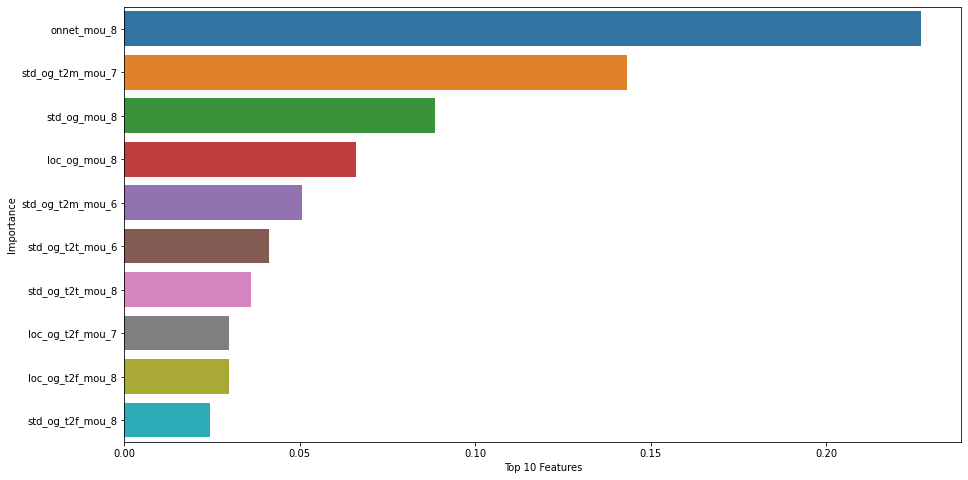

In [137]:
#Top 10 Features
plt.figure(figsize=(15, 8))

plot = sns.barplot(x='importance', y= 'col_name', data=sorted_feature_importance[0:10])
plot.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.show()

## Conclusion:

- We have performed different learning algorithms: Logistic Regression, Random Forest Classifier (with PCA and with all the features) and also XGBoost.
- From our model buidling we can conclude that the **Random Forest Classifier** with all the features is the **Best Candidate**
- XGBoost also performs pretty well but the results are not as good as random forest classifer with all features.

In [ ]:
importances = trained_rf_all.feature_importances_
cols = X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(cols)), reverse=True), columns={'col_name','importance'})
# Top 20 features
sorted_feature_importance.head(20) 